In [1]:
from IPython.display import display, HTML

display(
    HTML("""
<style>
* {font-family:D2Coding;}
div.container{width:78% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input { font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:3px;}
table.dataframe{font-size:12px;}
</style>
"""))

# 1. import & 한글설정 & 경고메세지 ignore¶

In [126]:
# 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 시각화의 선명도를 높임
%config InlineBackend.figure_format = "retina"

# seaborn 스타일 설정
sns.set(style='white', rc={'figure.figsize': (20, 5)})

# 한글설정
plt.rc('font', family='AppleGothic')  # 윈도우즈
plt.rc('axes', unicode_minus=False)  # 축의 - 깨짐 방지

# 다른 폰트를 기본으로 하려면
# import matplotlib.font_manager as fm
# font_file = 'C:/Windows/Fonts/HMKMMAG.TTF'
# font_name = fm.FontProperties(fname=font_file,
#                              size=15
#                              ).get_name()
# plt.rc('font', family=font_name)

# warning(경고) 안보이게
import warnings

warnings.filterwarnings(action='ignore')  # 경고 메세지 무시
# warnings.filterwarnings(action='default')

# 2. 서울과 부산데이터만 df 변수

In [6]:
%ls -la '/Volumes/DATA/mbc/ai_x/download/shareData/상가정보_20250331'

total 2891416
drwx------@ 20 teamkim  staff        680  4 29 13:51 ./
drwxr-xr-x   6 teamkim  staff        204  4 30 14:44 ../
-rw-rw-r--@  1 teamkim  staff       1011  4 21 15:13 [필독]파일열람방법.txt
-rw-rw-r--@  1 teamkim  staff   61715005  4 21 15:22 소상공인시장진흥공단_상가(상권)정보_대구_202503.csv
-rw-rw-r--@  1 teamkim  staff   32943677  4 21 15:24 소상공인시장진흥공단_상가(상권)정보_제주_202503.csv
-rw-rw-r--@  1 teamkim  staff  356572082  4 21 15:21 소상공인시장진흥공단_상가(상권)정보_경기_202503.csv
-rw-rw-r--@  1 teamkim  staff   40070868  4 21 15:22 소상공인시장진흥공단_상가(상권)정보_광주_202503.csv
-rw-rw-r--@  1 teamkim  staff   41491092  4 21 15:23 소상공인시장진흥공단_상가(상권)정보_대전_202503.csv
-rw-rw-r--@  1 teamkim  staff   84550600  4 21 15:23 소상공인시장진흥공단_상가(상권)정보_부산_202503.csv
-rw-rw-r--@  1 teamkim  staff  294549483  4 21 15:23 소상공인시장진흥공단_사

In [44]:
# 서울 소상공인 데이터
df_seoul = pd.read_csv(
    '/Volumes/DATA/mbc/ai_x/download/shareData/상가정보_20250331/소상공인시장진흥공단_상가(상권)정보_서울_202503.csv',
    # encoding='utf-8',
    # sep=',',
    #low_memory=False
)
df_seoul.shape

(540517, 39)

In [45]:
# 부산 소상공인 데이터
df_busan = pd.read_csv(
    '/Volumes/DATA/mbc/ai_x/download/shareData/상가정보_20250331/소상공인시장진흥공단_상가(상권)정보_부산_202503.csv'
)
df_busan.shape

(155537, 39)

In [46]:
print(df_seoul.columns)
print(df_busan.columns)

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')
Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')


In [47]:
df_seoul.columns==df_busan.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [48]:
df = pd.concat([df_seoul, df_busan])
df.shape

(696054, 39)

In [49]:
df.loc[0,['상호명','상권업종대분류명']]

,상호명,상권업종대분류명
0,부동산임대김은숙,음식
0,경희윤한의원,보건의료


In [50]:
df.reset_index(drop=True, inplace=True)
df.loc[0,['상호명','상권업종대분류명']]

상호명         부동산임대김은숙
상권업종대분류명          음식
Name: 0, dtype: object

In [51]:
df.index
# df.size

RangeIndex(start=0, stop=696054, step=1)

In [ ]:
# 현재 주피터 노트북이 쓰고 있는 메모리 용량
# pip install memory_profiler

In [52]:
%load_ext memory_profiler
%memit

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 1466.07 MiB, increment: 0.05 MiB


In [53]:
del df_seoul, df_busan

In [54]:
%load_ext memory_profiler
%memit

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 1400.11 MiB, increment: 0.00 MiB


# 3. df 데이터 셋의 결측치 확인 및 시각화

- [missingno 라이브러리] https://github.com/ResidentMario/missingno
- matplotlib

## (0) missingno 라이브로 결측치 시각화

- pip install missingno

<Axes: >

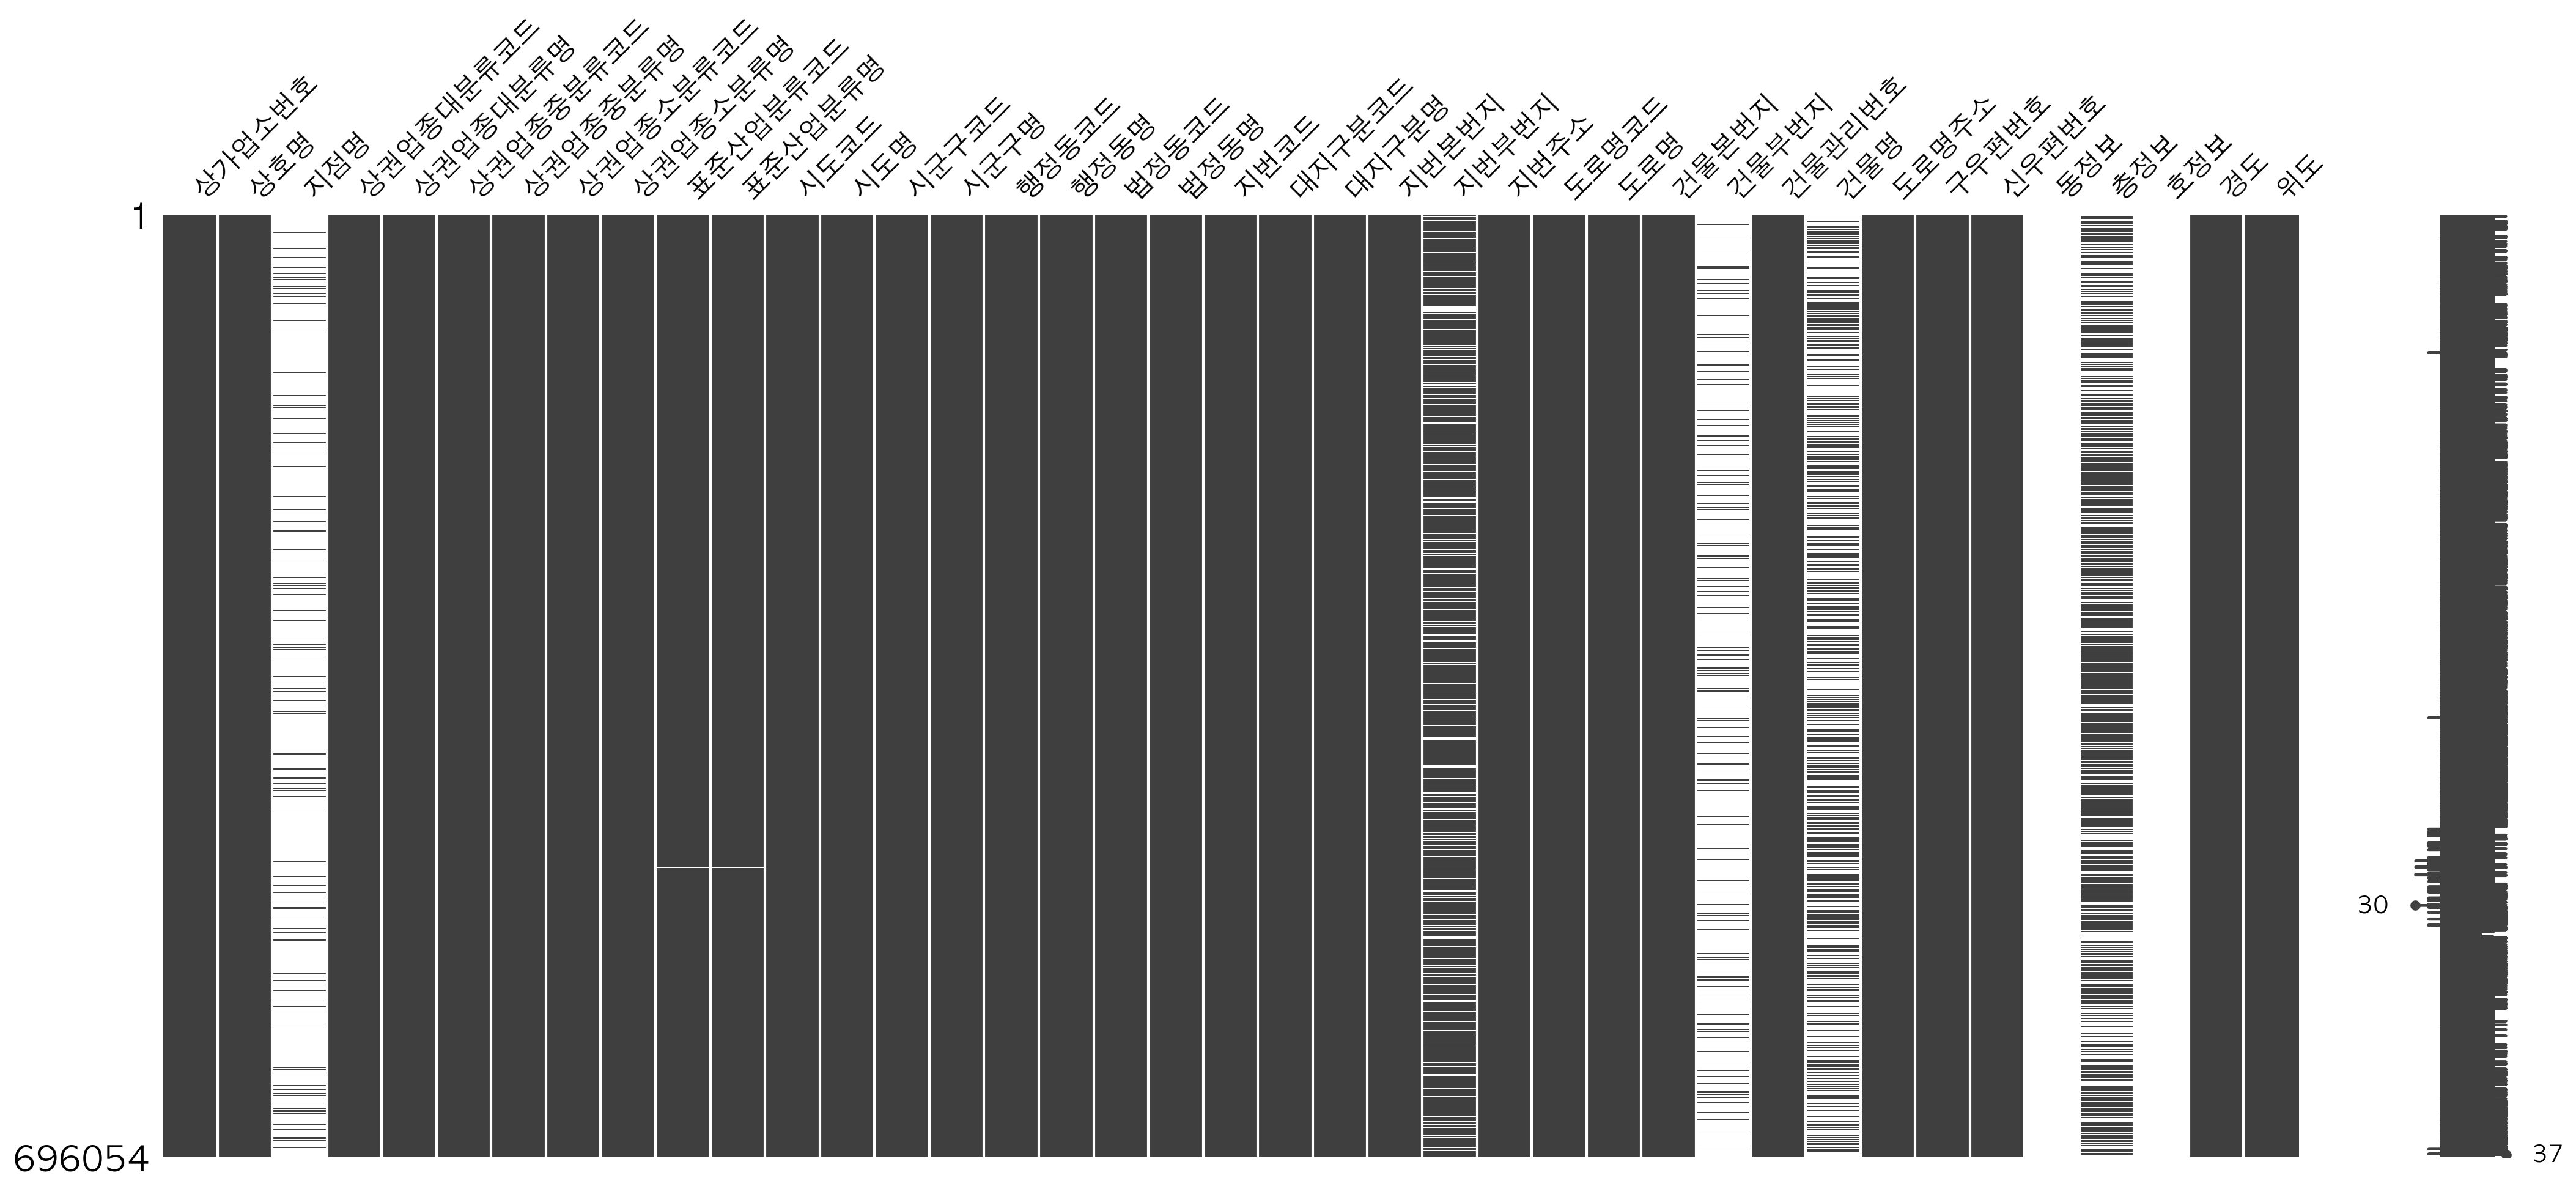

In [62]:
import missingno as msno
%matplotlib inline
msno.matrix(df) # 결측치가 없는 부분은 검정색, 결측치 부분은 하얀색

<Axes: >

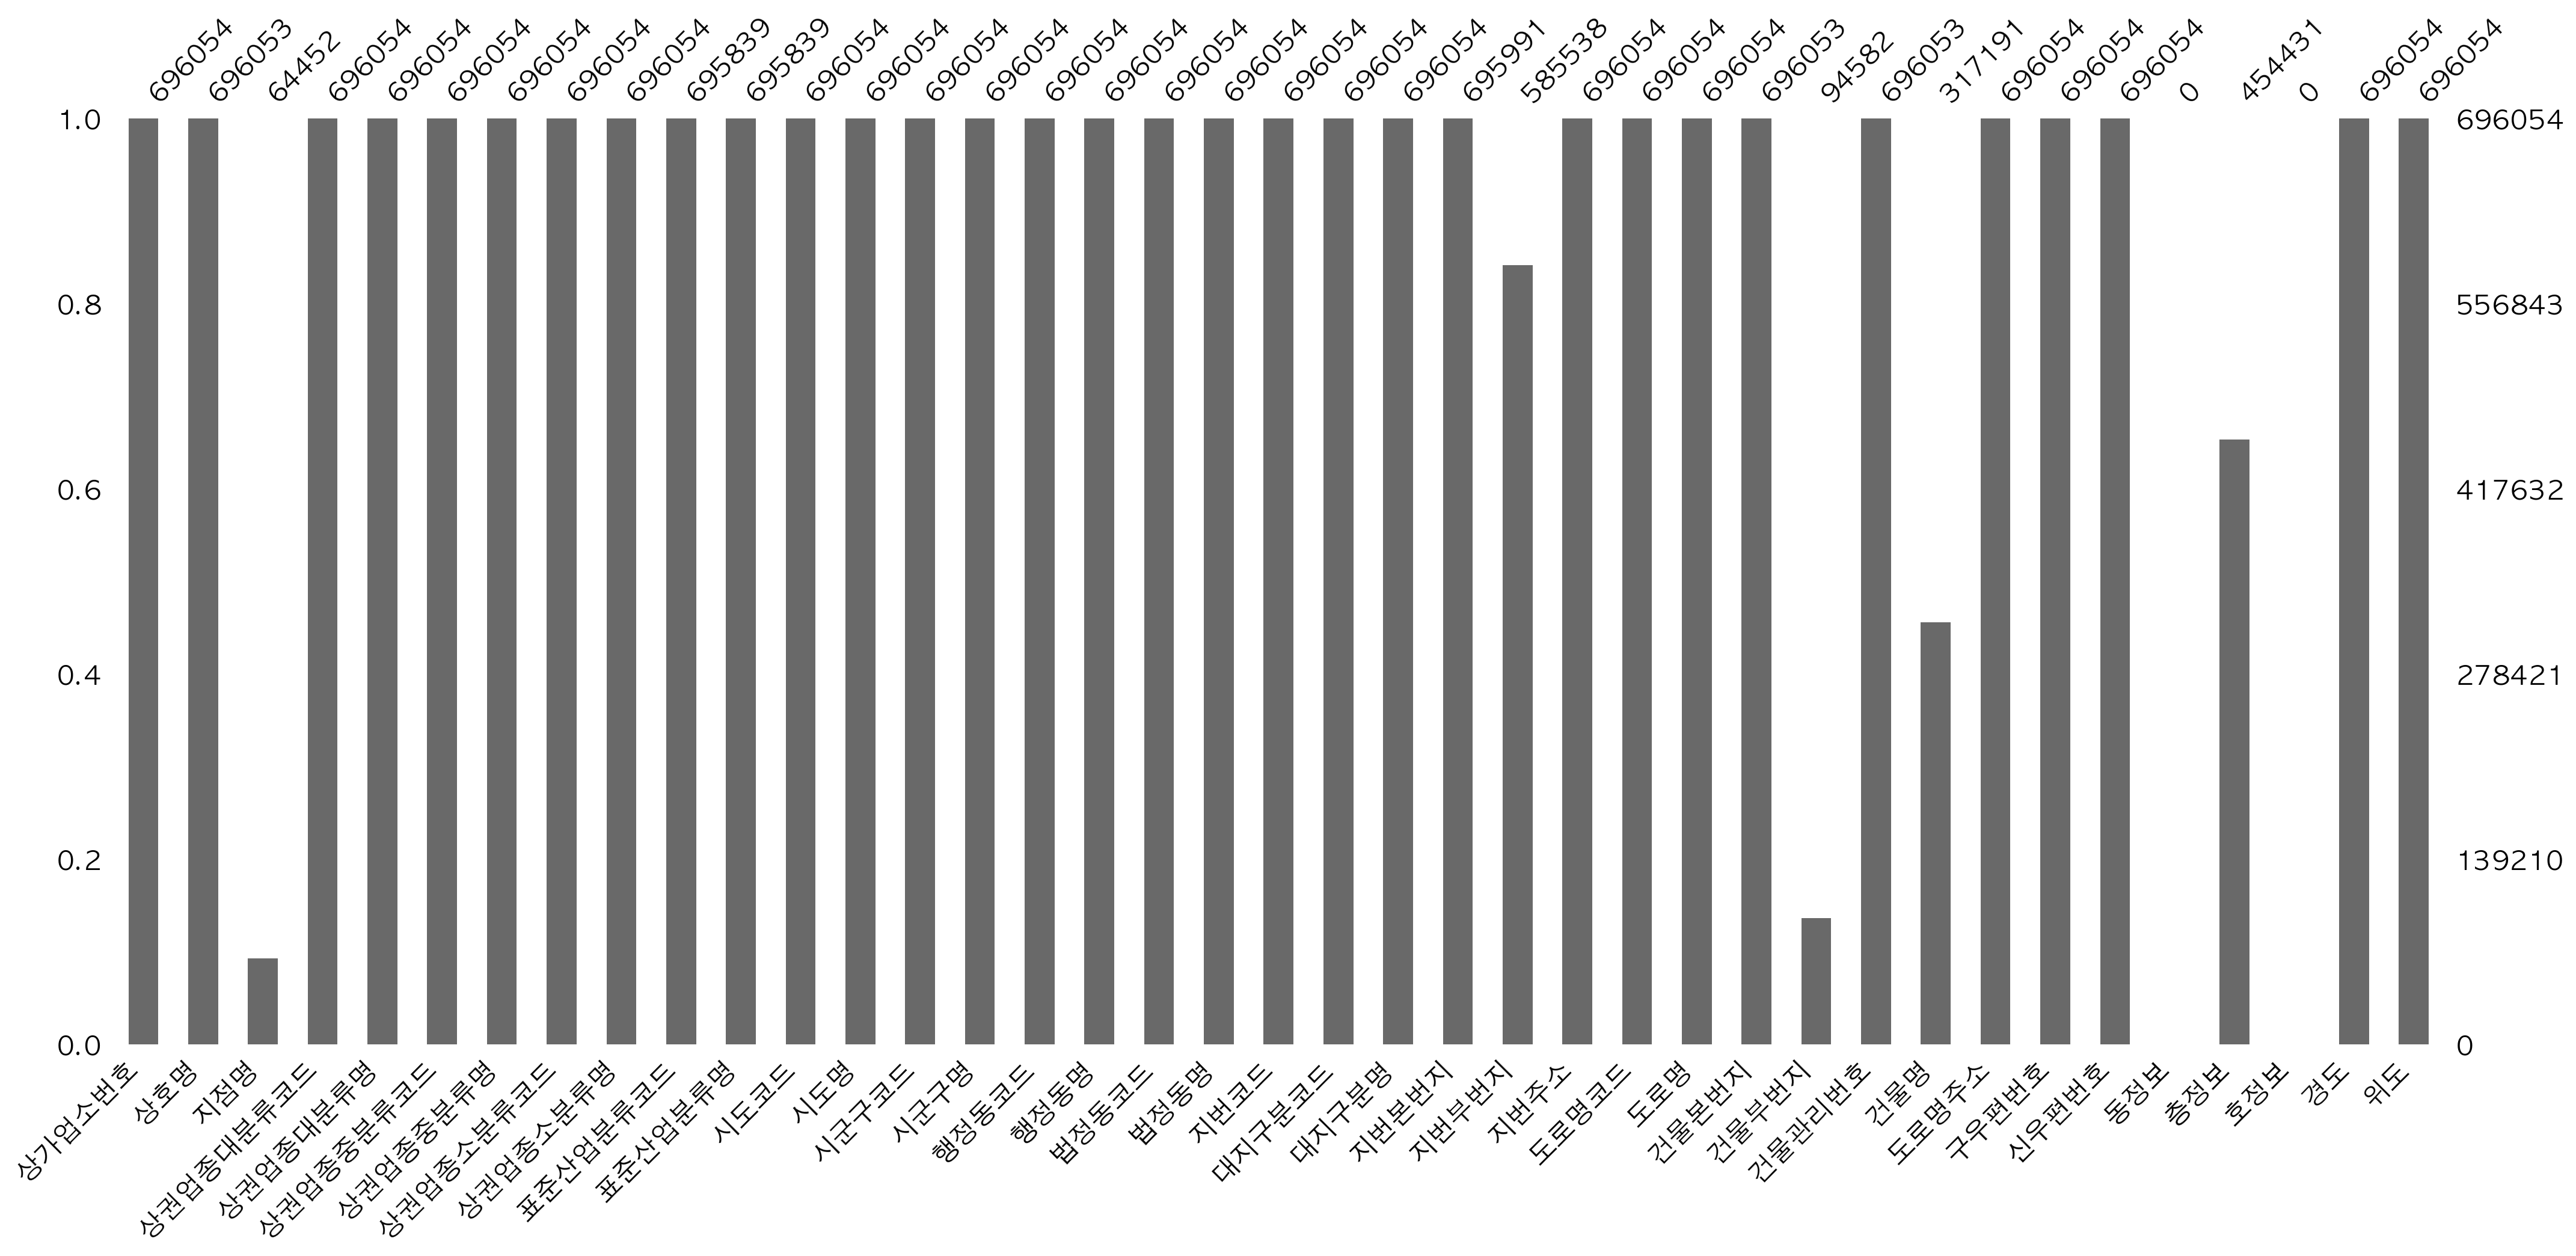

In [63]:
msno.bar(df) # 결측치가 아닌 데이터 갯수

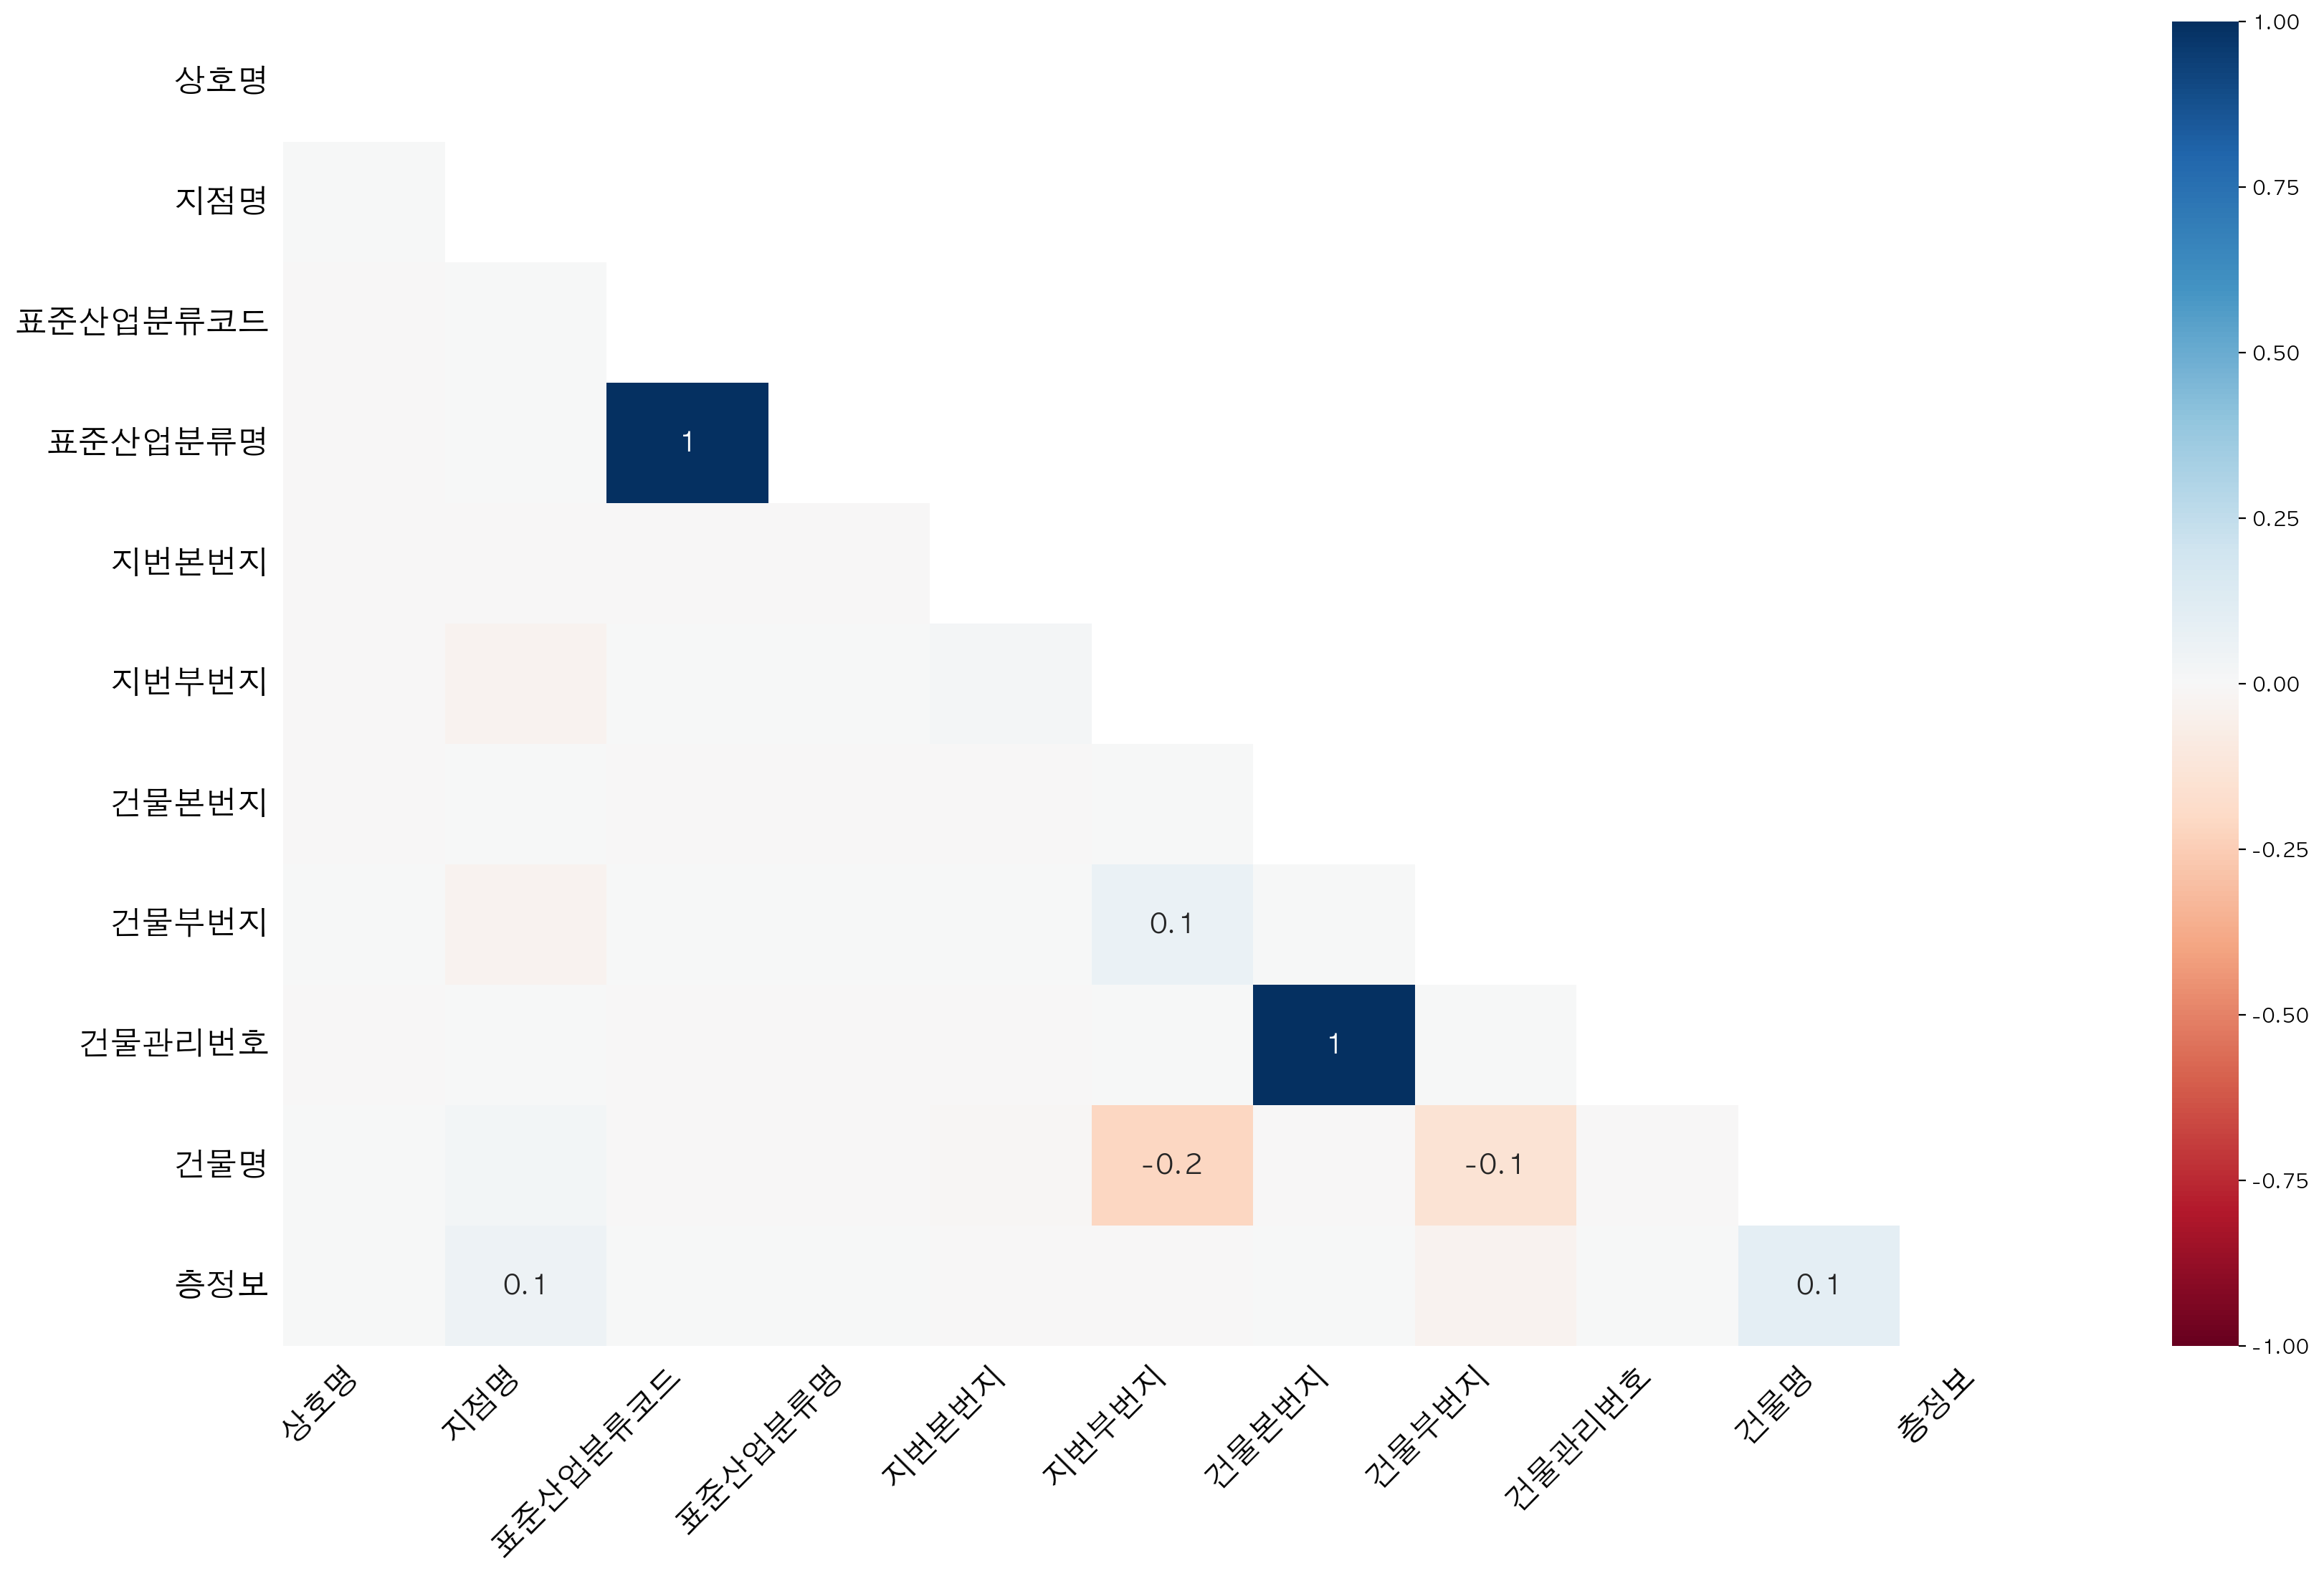

In [65]:
# 결측치가 있는 컬럼에  
msno.heatmap(df)
plt.show()

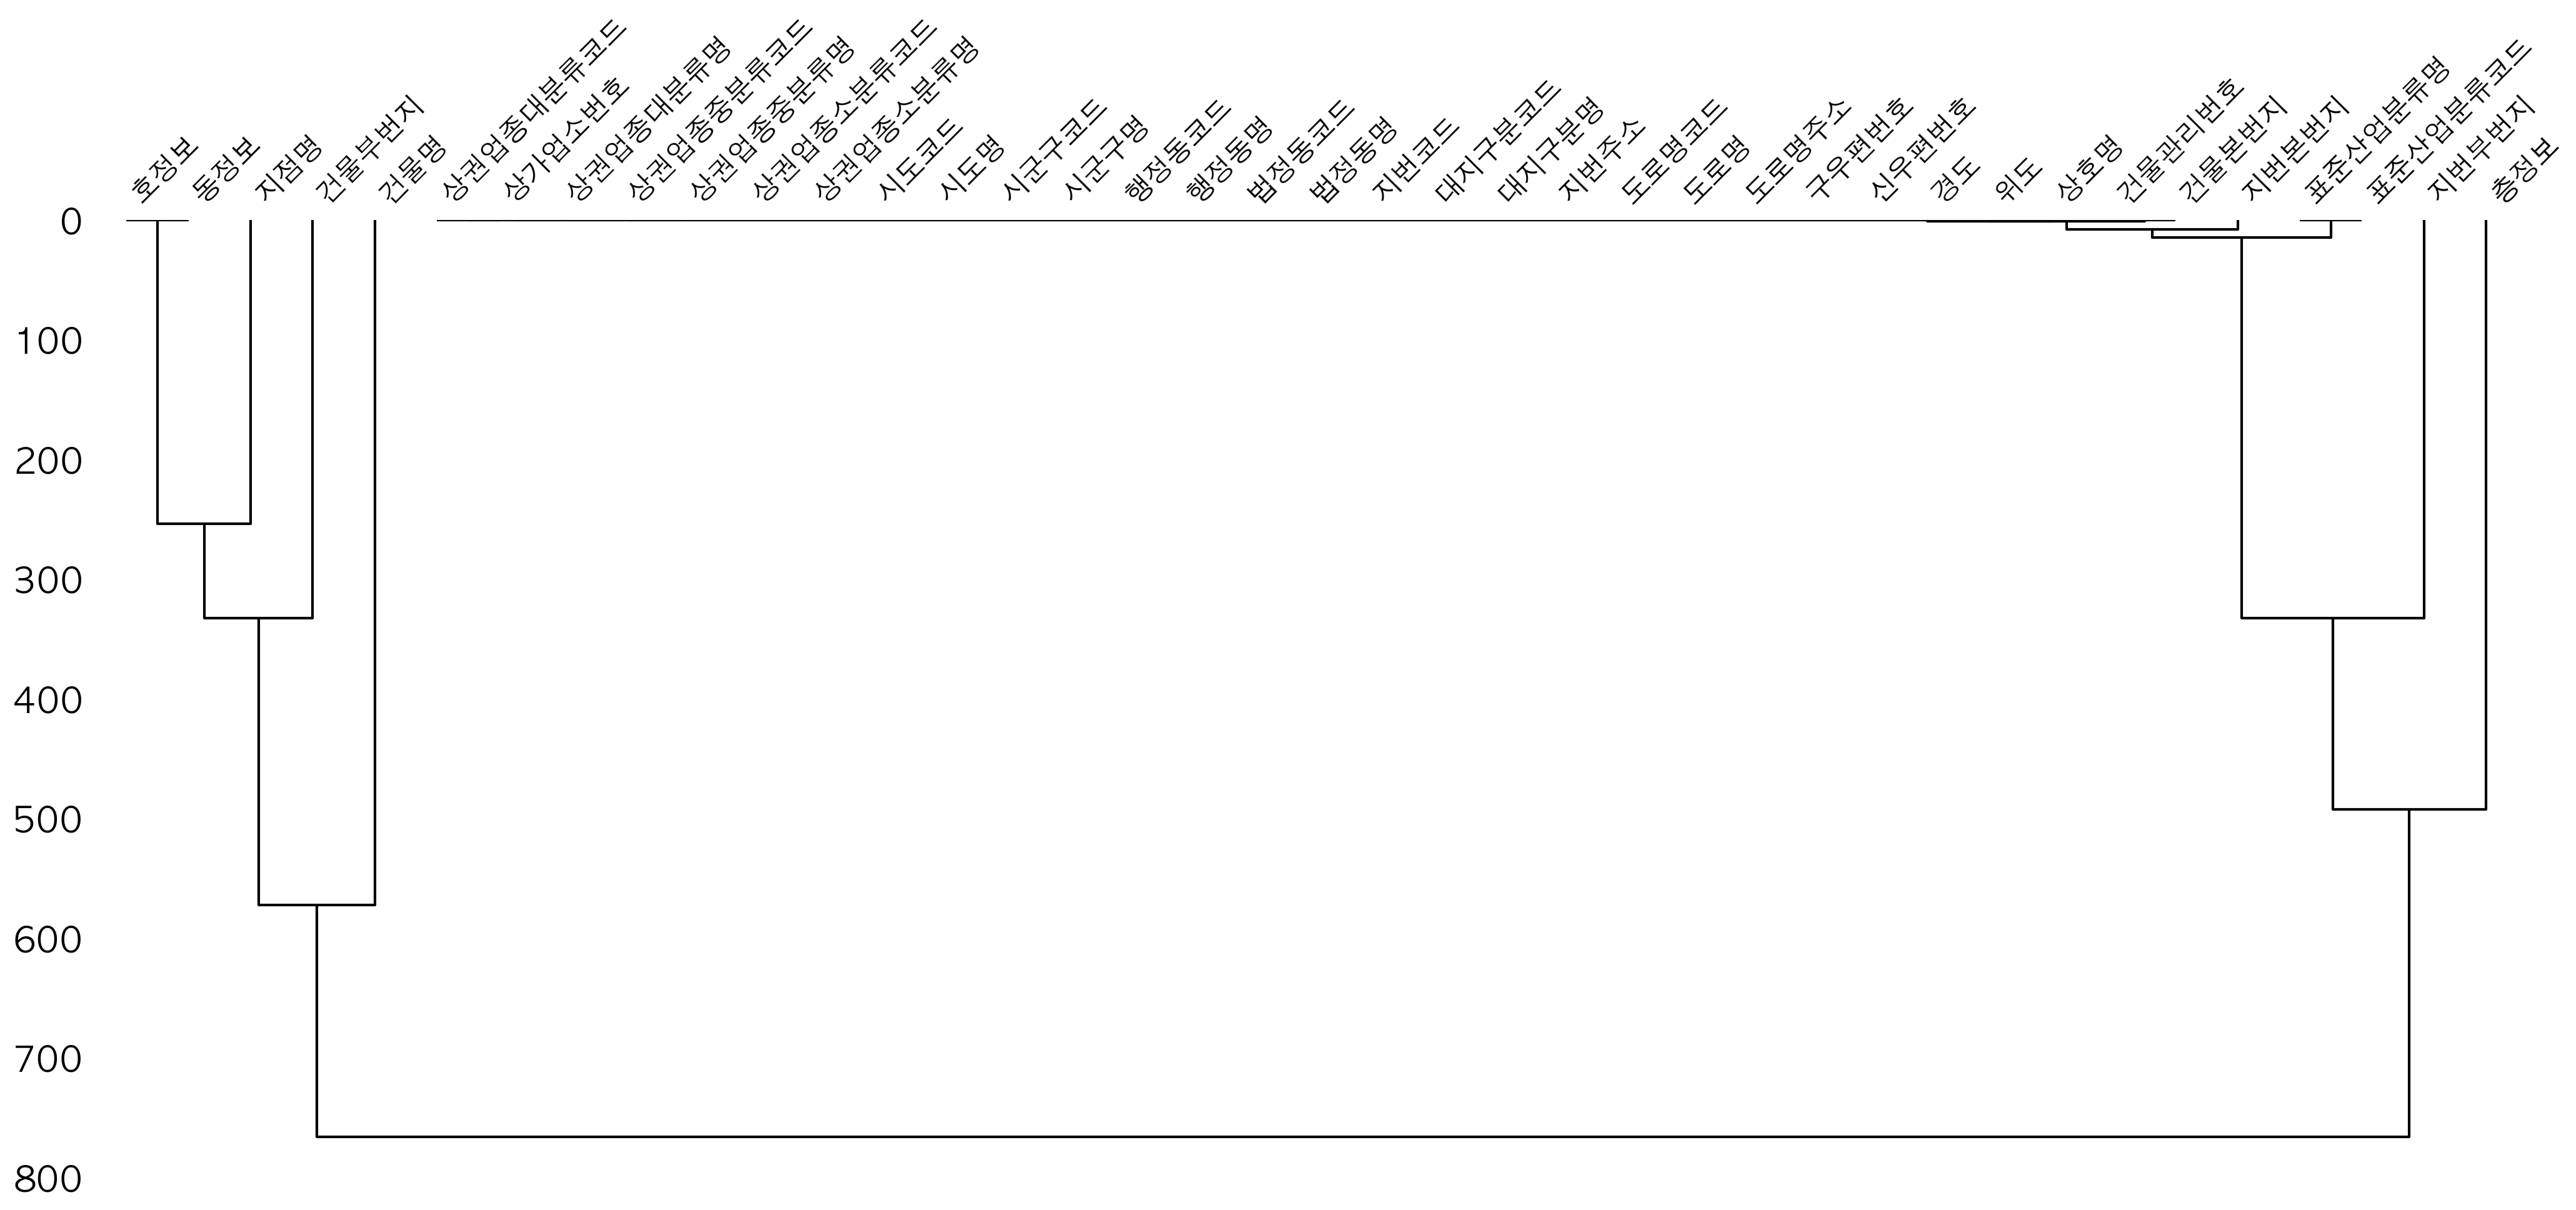

In [66]:
# 결측치가 있는 컬럼끼리 군집화
msno.dendrogram(df)
plt.show()

## 1. df 변수의 컬럼들을 확인하고 상위 3줄, 하위3줄을 출력한다.


In [67]:
df.head(3), df.loc[:2], df.iloc[:3], df.tail(3), df.iloc[-3:]

(                 상가업소번호         상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  \
 0  MA010120220800000033    부동산임대김은숙  NaN        I2       음식      I212   
 1  MA010120220800000036   한국황토건축연구소  NaN        L1      부동산      L102   
 2  MA010120220800000077  소망공인중개사사무소  NaN        L1      부동산      L102   
 
   상권업종중분류명 상권업종소분류코드    상권업종소분류명 표준산업분류코드  ...                     건물관리번호  \
 0    비알코올     I21201          카페   I56229  ...  1111014000100280021026727   
 1  부동산 서비스    L10203  부동산 중개/대리업   L68221  ...  1165010800113080025020133   
 2  부동산 서비스    L10203  부동산 중개/대리업   L68221  ...  1120012200100040011000899   
 
       건물명                 도로명주소   구우편번호 신우편번호  동정보  층정보  호정보          경도  \
 0     NaN   서울특별시 종로구 삼청로 122-1  110230  3053  NaN  NaN  NaN  126.981840   
 1  강남오피스텔  서울특별시 서초구 서초대로73길 40  137856  6612  NaN   11  NaN  127.024563   
 2     NaN  서울특별시 성동구 용답중앙15길 18  133847  4805  NaN    1  NaN  127.054262   
 
           위도  
 0  37.586250  
 1  37.500924  
 2  37.564786  
 
 [3 rows x 3

## 2. df 변수의 결측치를 제외한 데이터 개수 및 dtype들을 출력(dtypes함수)하고 변수가 사용되는 메모리 사용량 확인한다.

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696054 entries, 0 to 696053
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     696054 non-null  object 
 1   상호명        696053 non-null  object 
 2   지점명        64452 non-null   object 
 3   상권업종대분류코드  696054 non-null  object 
 4   상권업종대분류명   696054 non-null  object 
 5   상권업종중분류코드  696054 non-null  object 
 6   상권업종중분류명   696054 non-null  object 
 7   상권업종소분류코드  696054 non-null  object 
 8   상권업종소분류명   696054 non-null  object 
 9   표준산업분류코드   695839 non-null  object 
 10  표준산업분류명    695839 non-null  object 
 11  시도코드       696054 non-null  int64  
 12  시도명        696054 non-null  object 
 13  시군구코드      696054 non-null  int64  
 14  시군구명       696054 non-null  object 
 15  행정동코드      696054 non-null  int64  
 16  행정동명       696054 non-null  object 
 17  법정동코드      696054 non-null  int64  
 18  법정동명       696054 non-null  object 
 19  지번코드       696054 non-n

## 3. 결측치를 확인하고 결측치가 없는 컬럼을 포함하여 시각화(정렬전 bar plot, barh plot, 정렬 후 bar plot, barh plot)


In [71]:
# 열별 결측치 갯수
missing_cnt = df.isnull().sum() 
missing_cnt.head()

상가업소번호            0
상호명               1
지점명          631602
상권업종대분류코드         0
상권업종대분류명          0
dtype: int64

<Axes: >

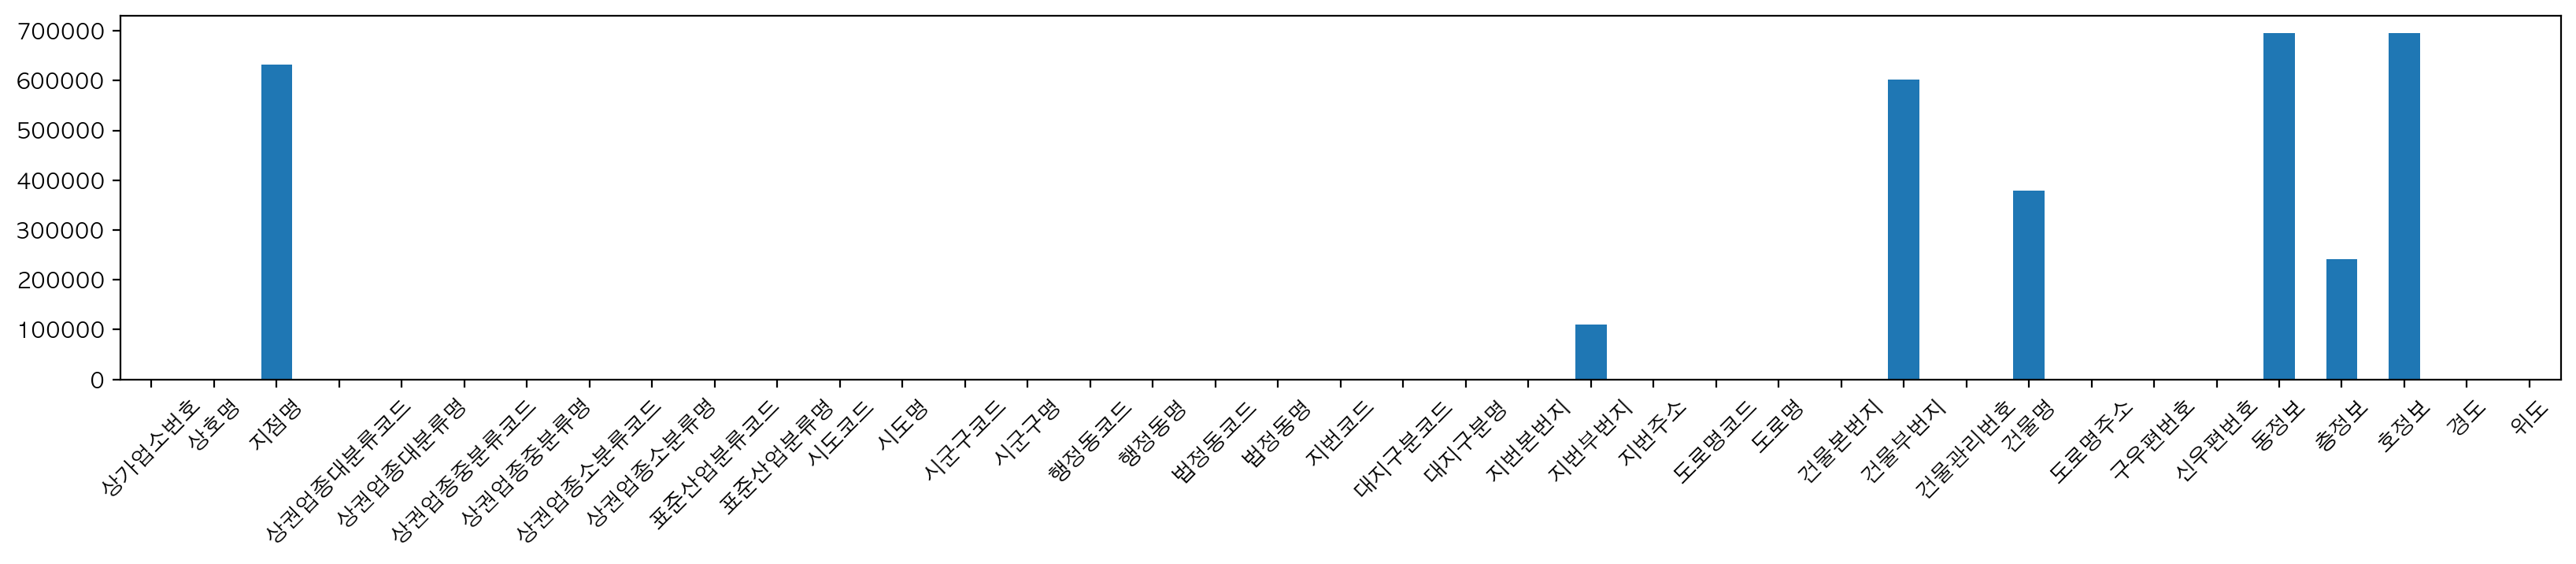

In [76]:
# missing_cnt.plot(kind='bar',)
missing_cnt.plot.bar(rot=45, figsize=(20, 3))

<Axes: >

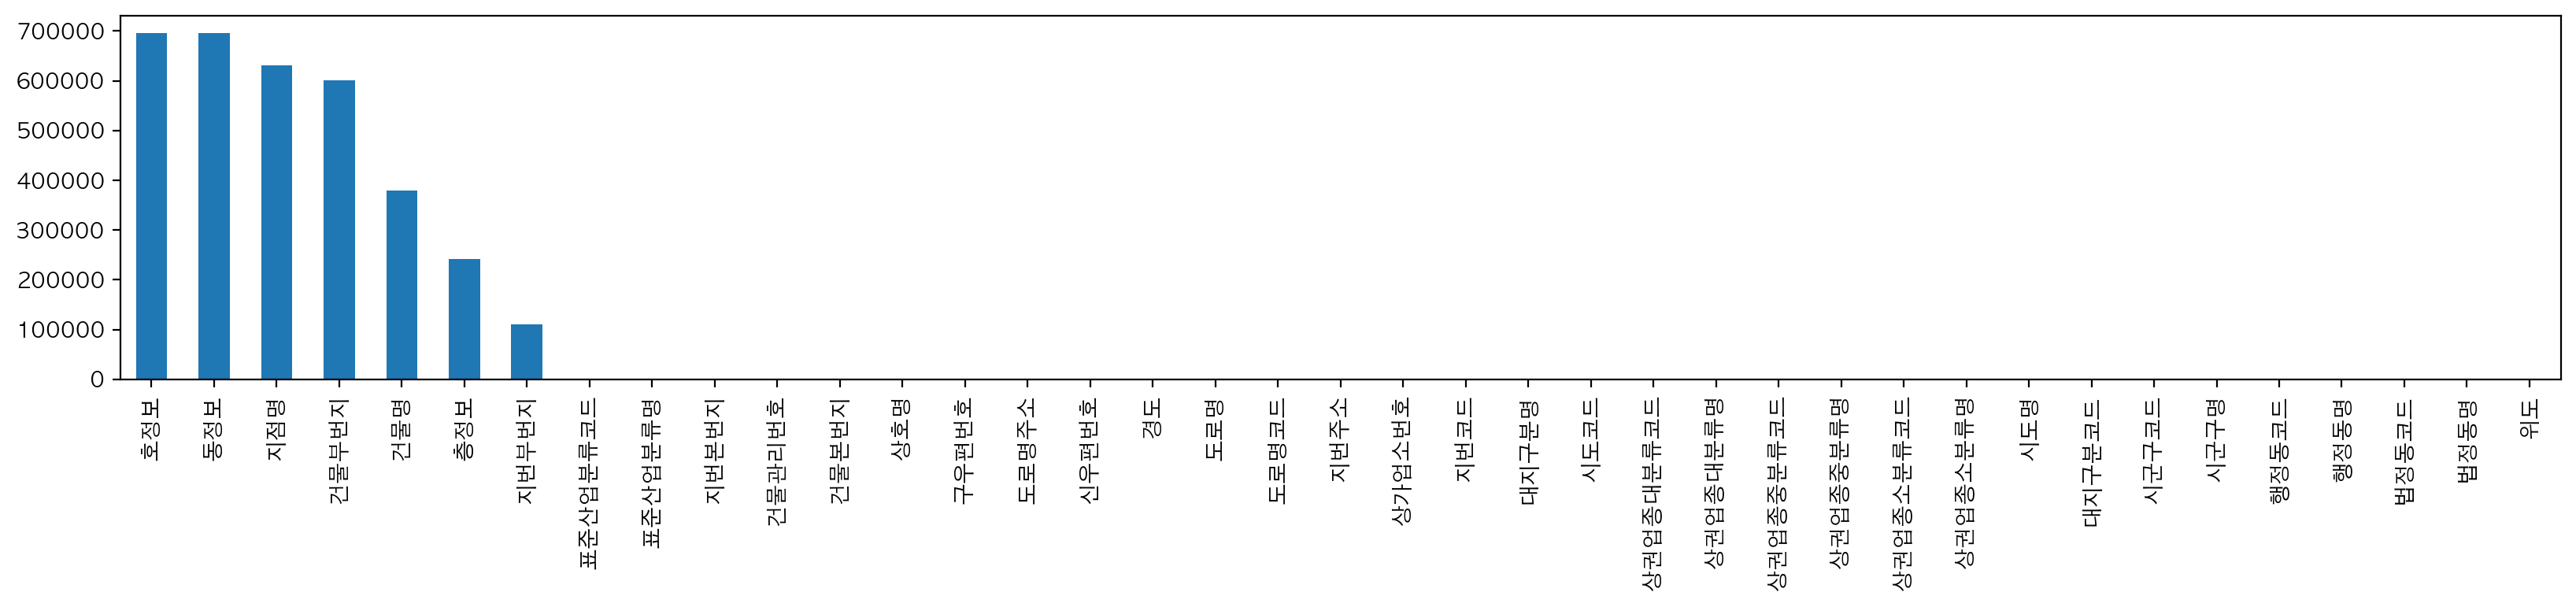

In [79]:
missing_cnt_sort = missing_cnt.sort_values(ascending=False)
missing_cnt_sort.plot(kind='bar', figsize=(20, 3))

<Axes: >

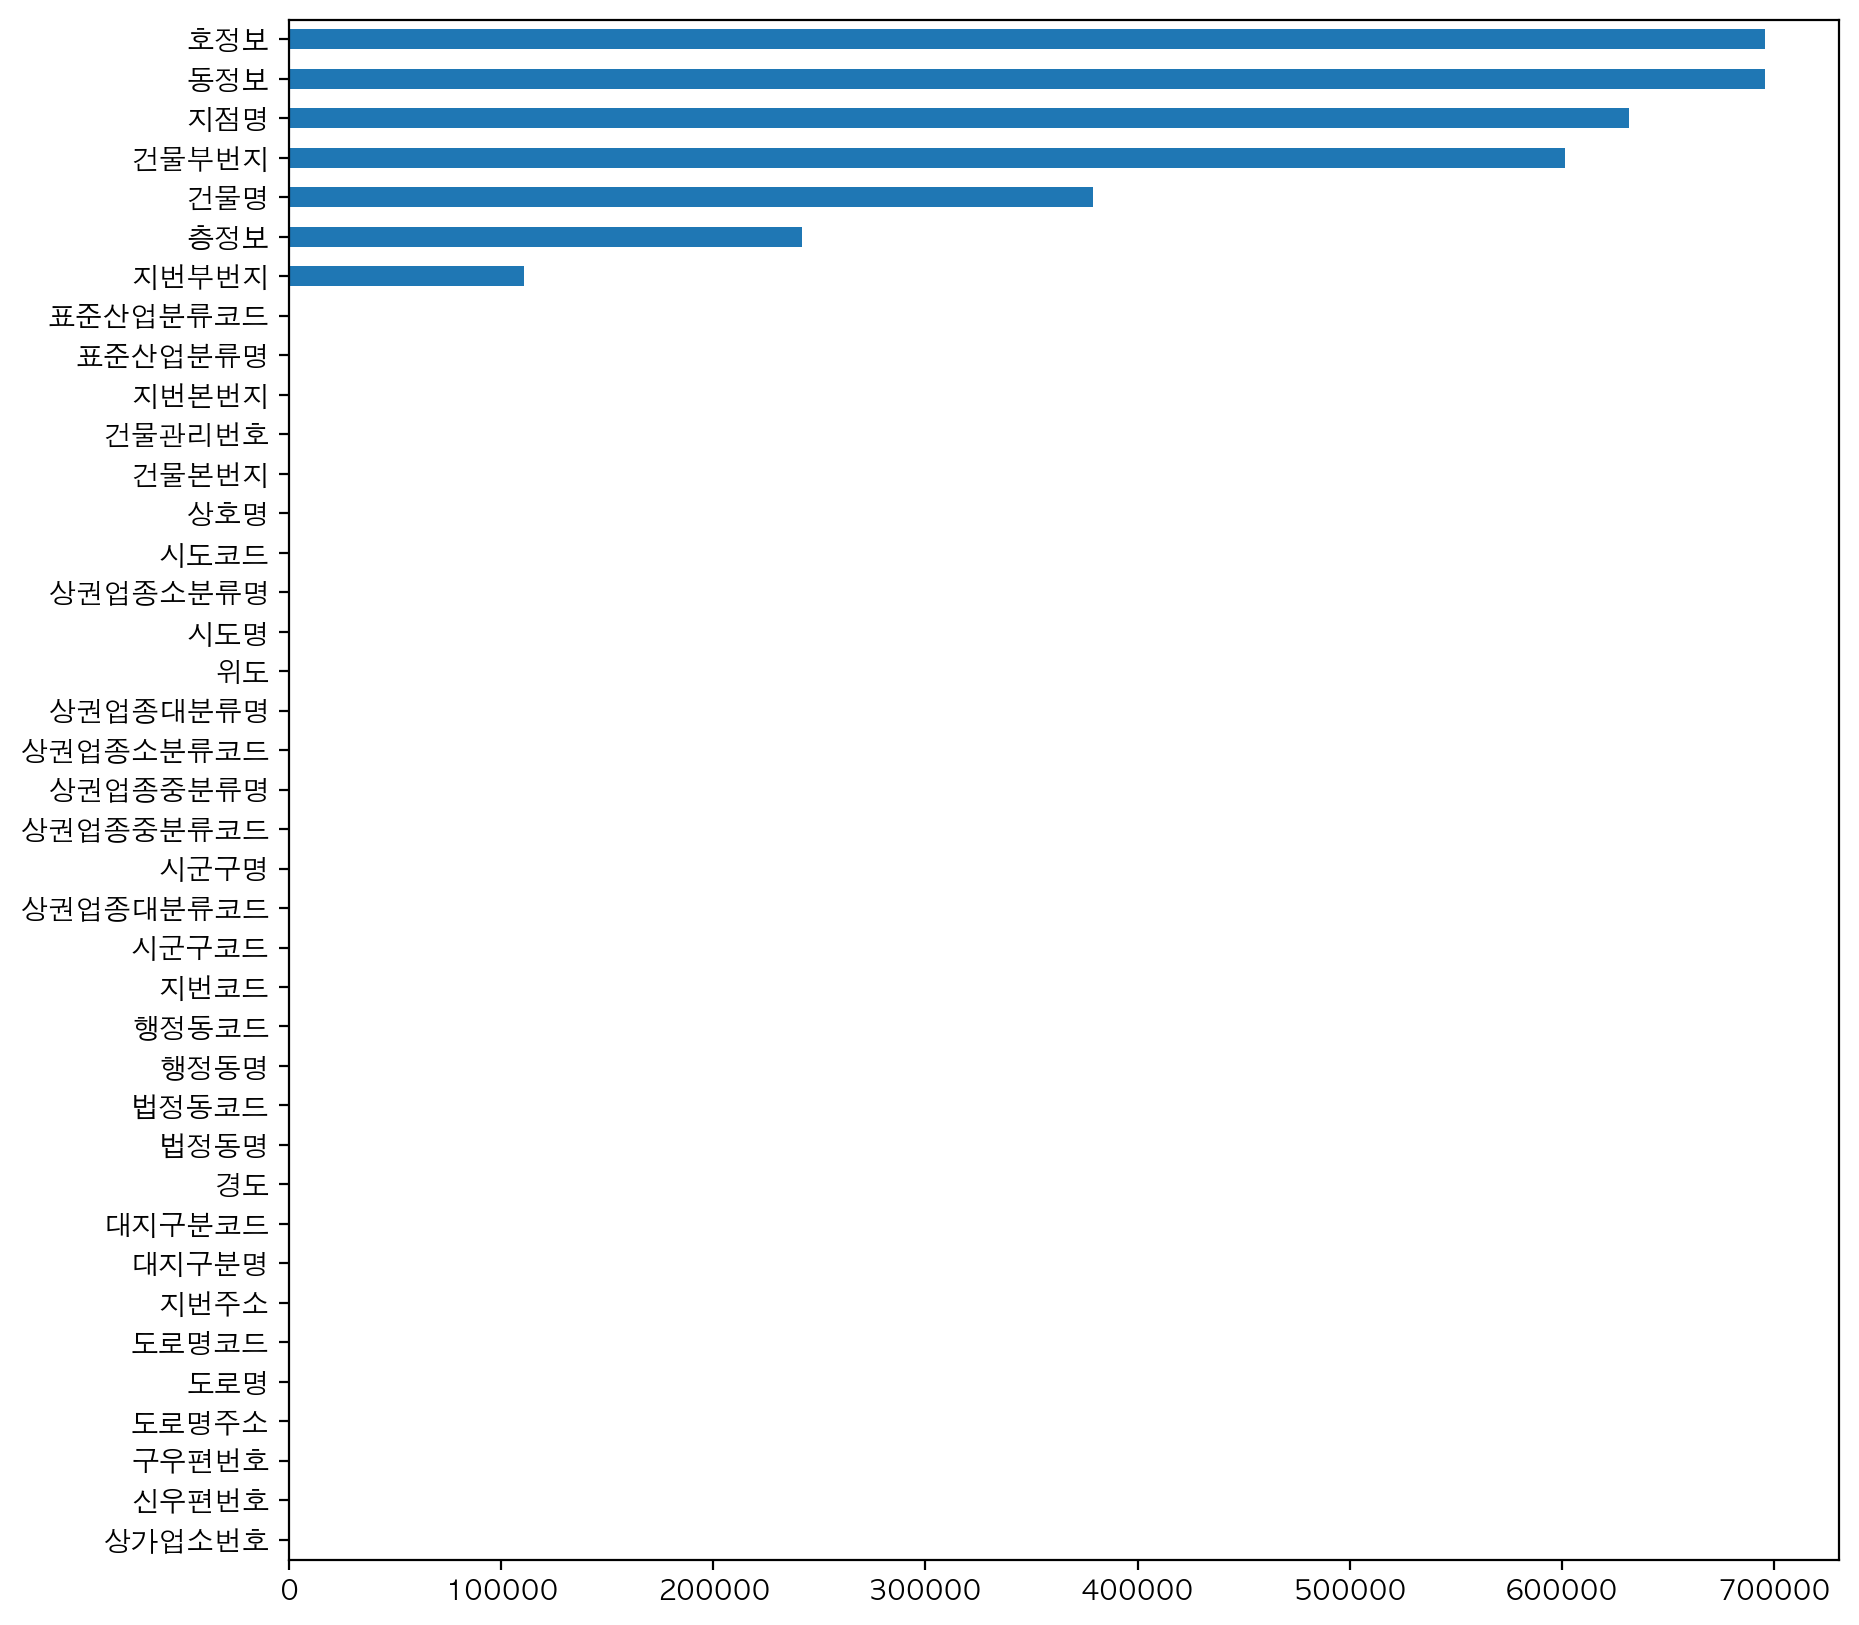

In [85]:
missing_cnt_sort.plot(kind='barh', figsize=(10, 10))

## 4. 결측치가 없는 컬럼는 제외하고 시각화(정렬전 bar plot, barh plot, 정렬 후 bar plot, barh plot).


In [89]:
only_missing_cnt = missing_cnt[missing_cnt != 0]
only_missing_cnt

상호명              1
지점명         631602
표준산업분류코드       215
표준산업분류명        215
지번본번지           63
지번부번지       110516
건물본번지            1
건물부번지       601472
건물관리번호           1
건물명         378863
동정보         696054
층정보         241623
호정보         696054
dtype: int64

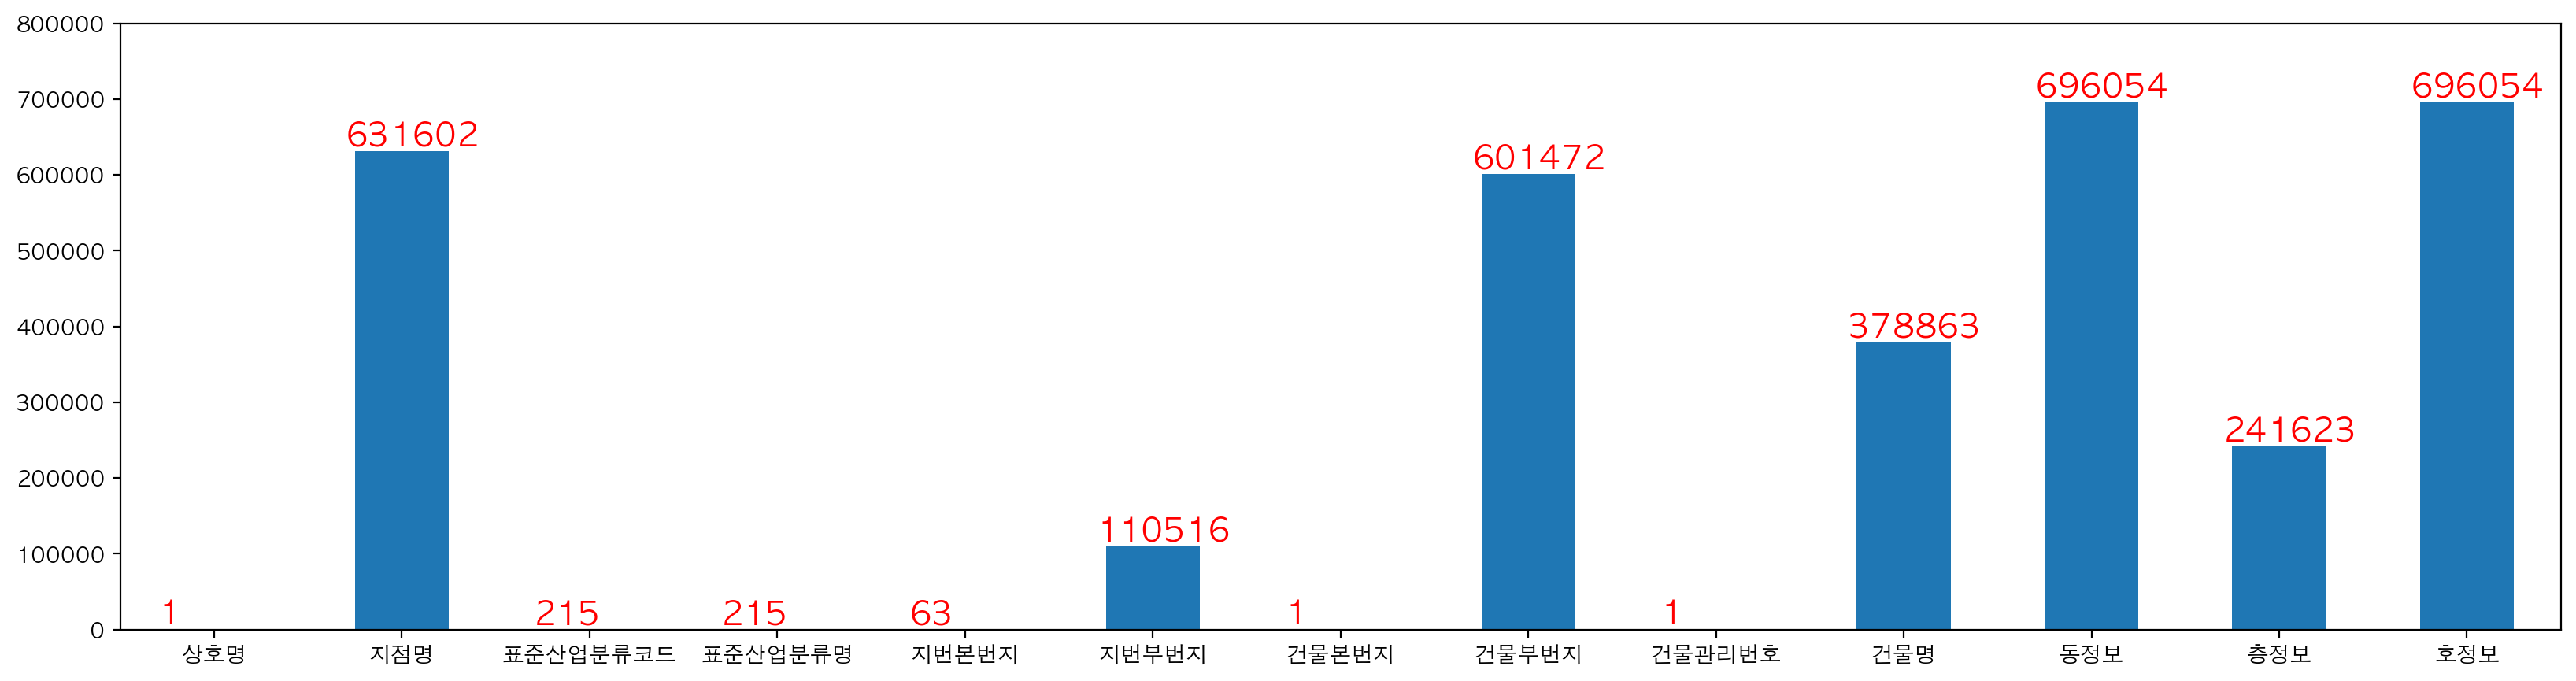

In [125]:
only_missing_cnt.plot(rot=0, kind='bar', figsize=(20, 5), ylim=[0, 800000])

for idx, val in enumerate(only_missing_cnt):

    plt.text(idx - 0.3,
             val,
             val,
             size=15,
             color='r',
             weight='bold',
             va='bottom')
# plt.text(0, 1, 1)
# plt.text(12 - 0.25, 696054, 696054)

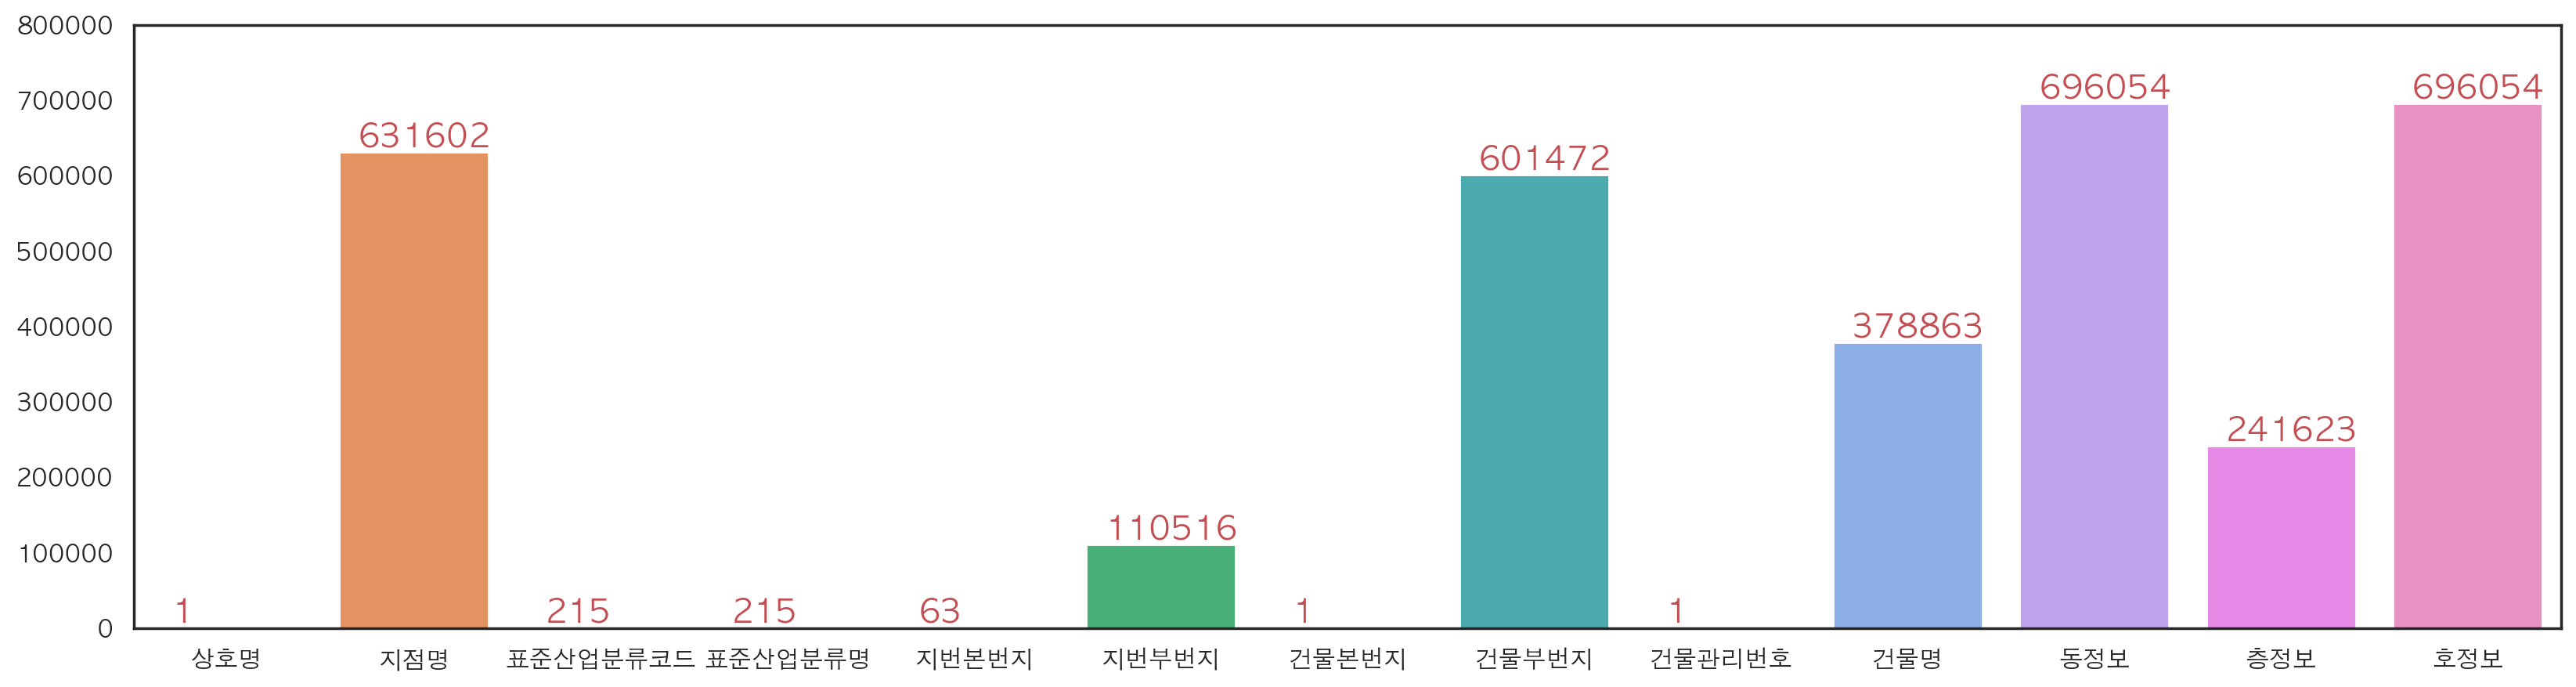

In [137]:
# sns.barplot(data=데이터프레임변수, x=x축이될변수, y=)
g = sns.barplot(x=only_missing_cnt.index, y=only_missing_cnt)

for idx, val in enumerate(only_missing_cnt):

    plt.text(idx - 0.3,
             val,
             val,
             size=15,
             color='r',
             weight='bold',
             va='bottom')
# plt.ylim([0,800000])
g.set_ylim([0, 800000])
plt.show()

Text(0.5, 1.0, '결측치 갯수')

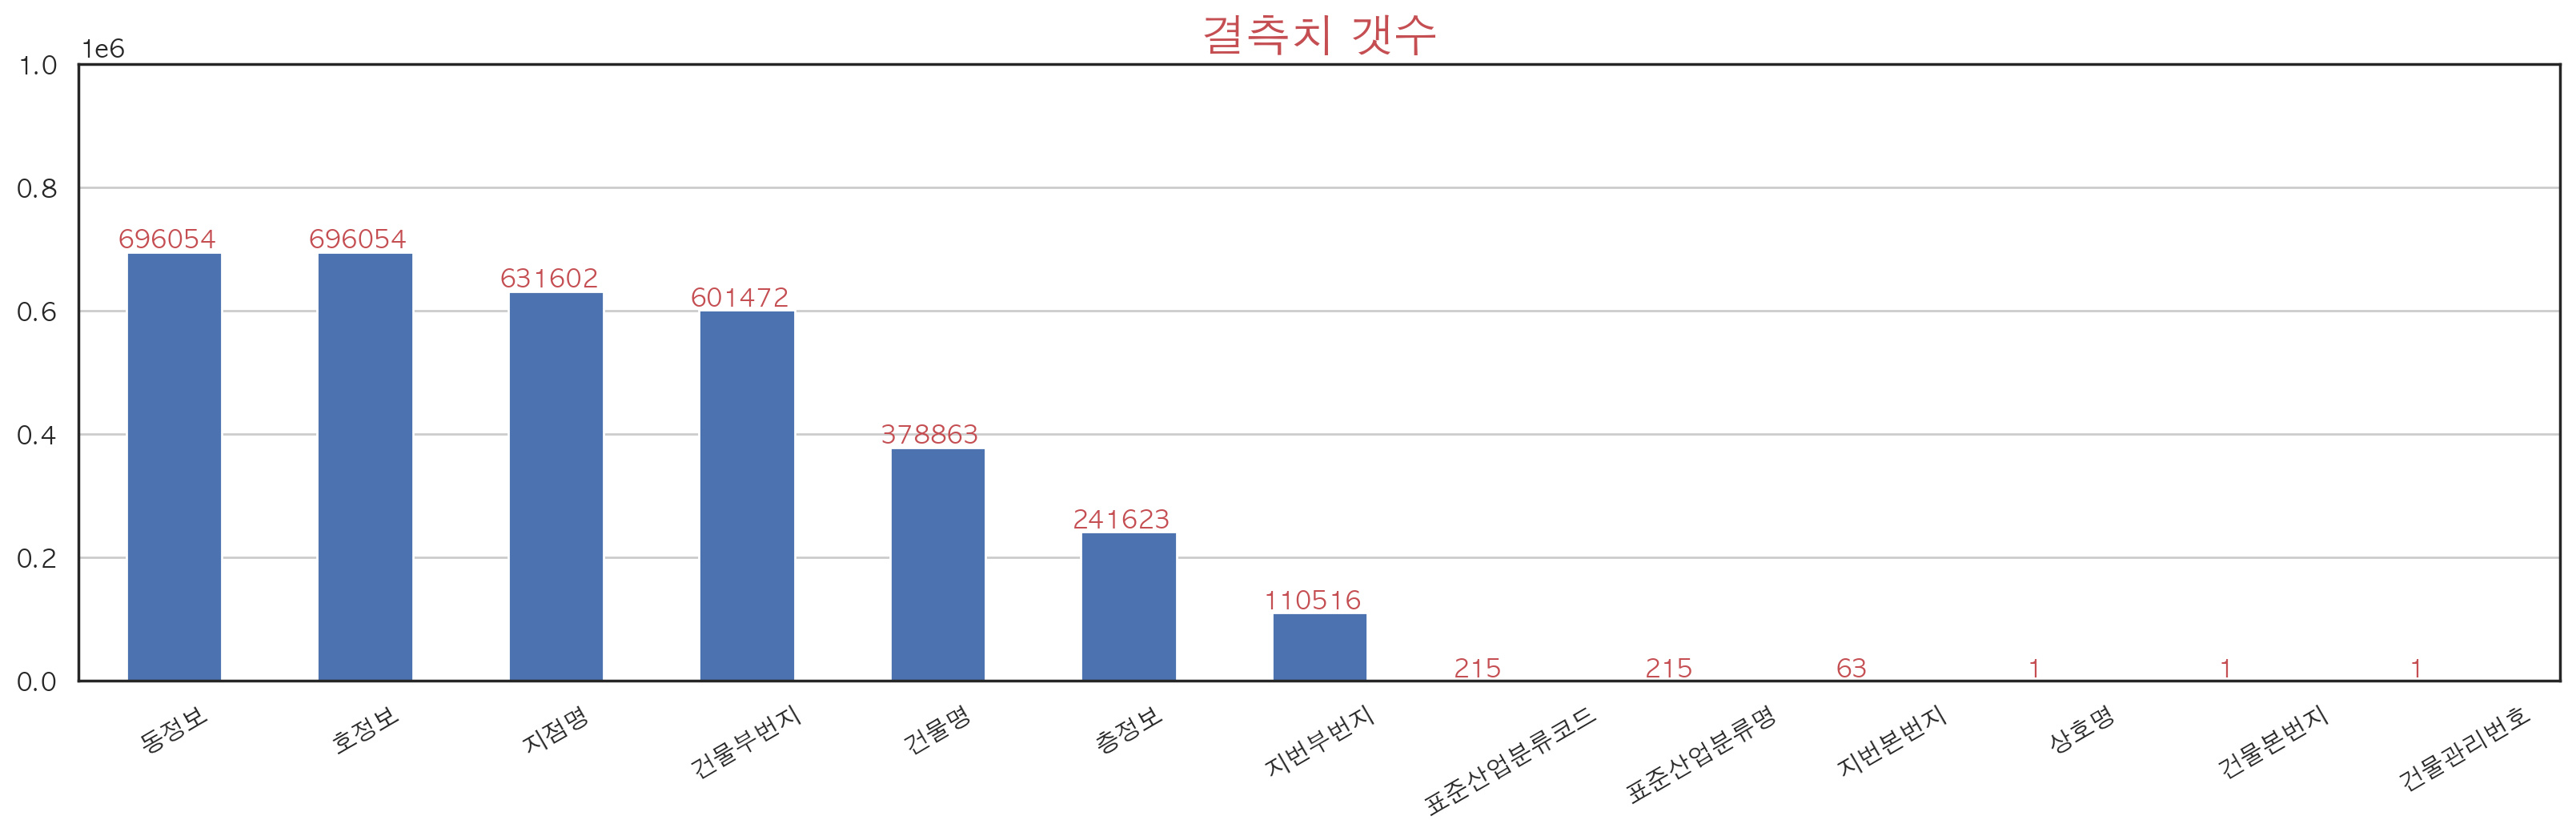

In [149]:
only_missing_cnt_sorted = only_missing_cnt.sort_values(ascending=False)
only_missing_cnt_sorted.plot.bar(rot=30, ylim=[0,1000000])

for idx, val in enumerate(only_missing_cnt_sorted):

    plt.text(idx - 0.3,
             val,
             val,
             size=11,
             color='r',
             weight='bold',
             va='bottom')

plt.grid(axis='y')
plt.title('결측치 갯수', color='r', fontsize=20, weight='bold')

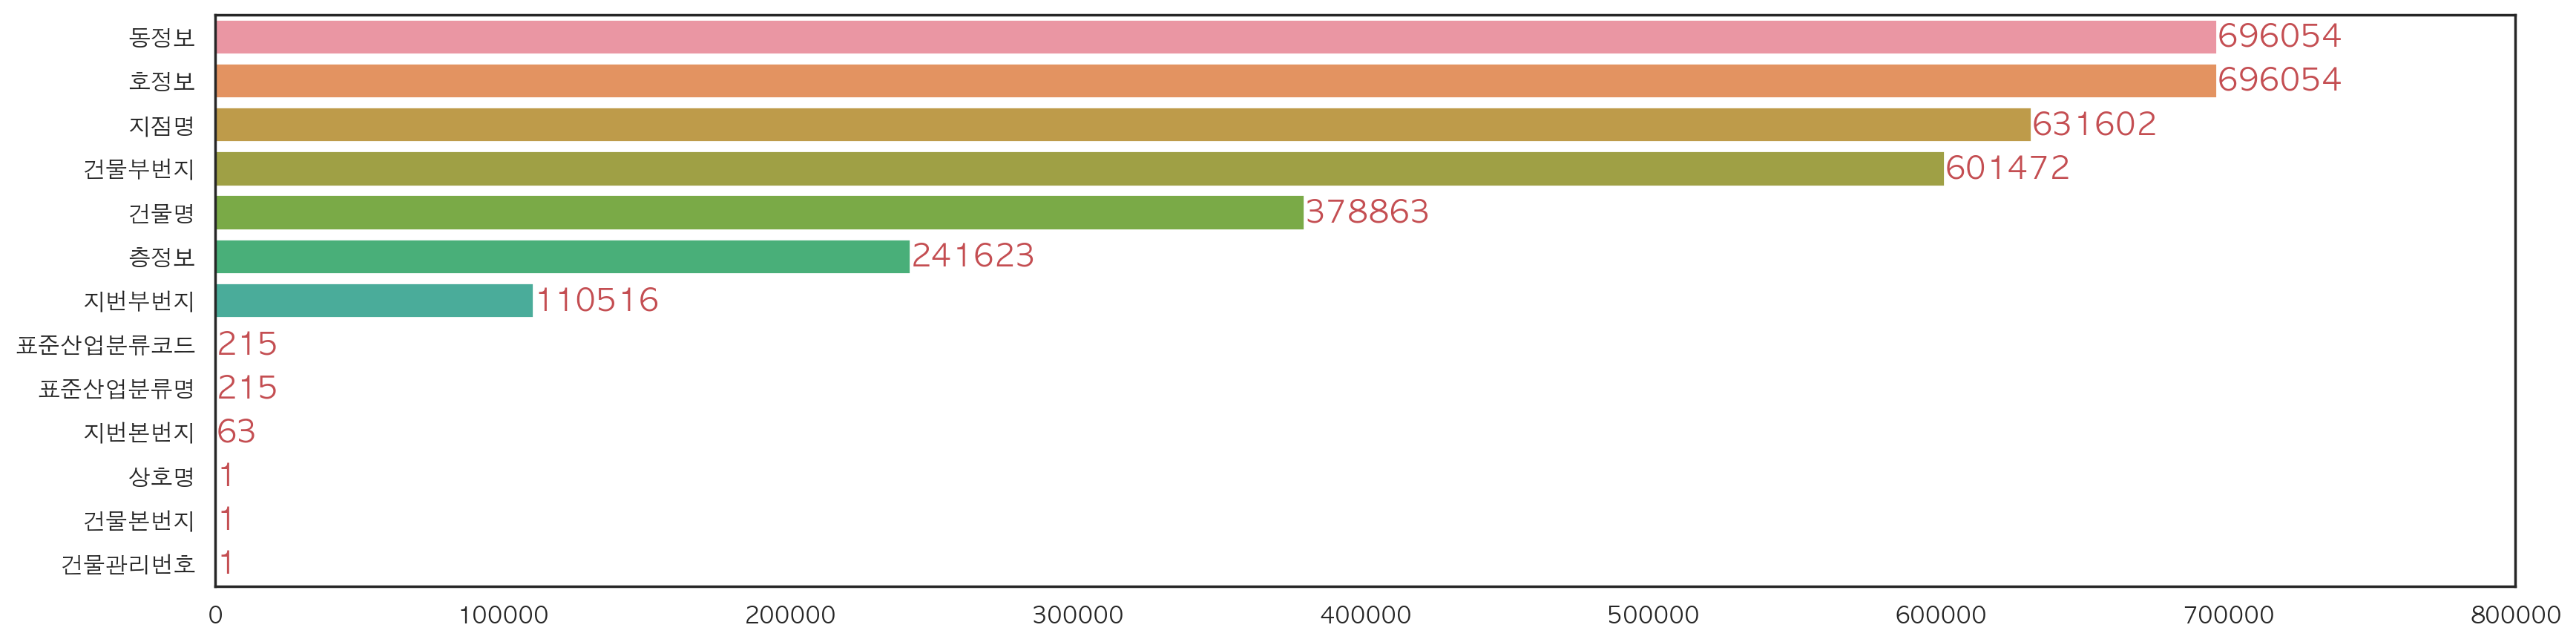

In [155]:
# sns.barplot(data=데이터프레임변수, x=x축이될변수, y=)
g = sns.barplot(y=only_missing_cnt_sorted.index, x=only_missing_cnt_sorted)

for idx, val in enumerate(only_missing_cnt_sorted):

    plt.text(val,
             idx,
             val,
             size=15,
             color='r',
             weight='bold',
             va='center')
g.set_xlim([0, 800000])
plt.show()

# 4. df 데이터 셋에서 사용하지 않을 컬럼은 제거

## 1. 결측치가 너무 많은 컬럼은 제거한다. 결측치가 너무 많은 상위 9개 컬럼은 제거함.


In [158]:
not_use = df.isna().sum().sort_values(ascending=False).head(9)
not_use.index

Index(['호정보', '동정보', '지점명', '건물부번지', '건물명', '층정보', '지번부번지', '표준산업분류코드',
       '표준산업분류명'],
      dtype='object')

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696054 entries, 0 to 696053
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     696054 non-null  object 
 1   상호명        696053 non-null  object 
 2   지점명        64452 non-null   object 
 3   상권업종대분류코드  696054 non-null  object 
 4   상권업종대분류명   696054 non-null  object 
 5   상권업종중분류코드  696054 non-null  object 
 6   상권업종중분류명   696054 non-null  object 
 7   상권업종소분류코드  696054 non-null  object 
 8   상권업종소분류명   696054 non-null  object 
 9   표준산업분류코드   695839 non-null  object 
 10  표준산업분류명    695839 non-null  object 
 11  시도코드       696054 non-null  int64  
 12  시도명        696054 non-null  object 
 13  시군구코드      696054 non-null  int64  
 14  시군구명       696054 non-null  object 
 15  행정동코드      696054 non-null  int64  
 16  행정동명       696054 non-null  object 
 17  법정동코드      696054 non-null  int64  
 18  법정동명       696054 non-null  object 
 19  지번코드       696054 non-n

In [161]:
# 컬러 삭제 전 메모리 사용량 : 207.1+ MB
print('컬럼 제거전 shape : ', df.shape)
df.drop(not_use.index, axis=1, inplace=True)
print('컬럼 제거후 shape : ', df.shape)

컬럼 제거전 shape :  (696054, 39)
컬럼 제거후 shape :  (696054, 30)


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696054 entries, 0 to 696053
Data columns (total 30 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     696054 non-null  object 
 1   상호명        696053 non-null  object 
 2   상권업종대분류코드  696054 non-null  object 
 3   상권업종대분류명   696054 non-null  object 
 4   상권업종중분류코드  696054 non-null  object 
 5   상권업종중분류명   696054 non-null  object 
 6   상권업종소분류코드  696054 non-null  object 
 7   상권업종소분류명   696054 non-null  object 
 8   시도코드       696054 non-null  int64  
 9   시도명        696054 non-null  object 
 10  시군구코드      696054 non-null  int64  
 11  시군구명       696054 non-null  object 
 12  행정동코드      696054 non-null  int64  
 13  행정동명       696054 non-null  object 
 14  법정동코드      696054 non-null  int64  
 15  법정동명       696054 non-null  object 
 16  지번코드       696054 non-null  int64  
 17  대지구분코드     696054 non-null  int64  
 18  대지구분명      696054 non-null  object 
 19  지번본번지      695991 non-n

## 2. 컬럼명에 “코드”나 “번호”가 있는 컬럼은 분석에 사용되지 않을 예정입니다. 제거함
- ( df.columns.str.contains(“코드|번호”) 이용).
- ( df.columns.str.find(‘코드”)!=-1 ) | ( df.columns.str.find(‘번호”)!=-1 )


In [166]:
cols = df.columns

In [177]:
# 코드나 번호가 포함된 컬럼명 1
# cols[(cols.str.find('코드') != -1) | (cols.str.find('번호') != -1)]

In [176]:
# 코드나 번호가 포함된 컬럼명 2
drop_col = cols[cols.str.contains("코드|번호")]
drop_col

Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드',
       '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', '건물관리번호', '구우편번호',
       '신우편번호'],
      dtype='object')

In [178]:

print('컬럼 제거전 shape : ', df.shape)
df.drop(drop_col, axis=1, inplace=True)
print('컬럼 제거후 shape : ', df.shape)

컬럼 제거전 shape :  (696054, 30)
컬럼 제거후 shape :  (696054, 16)


## 3. 컬럼을 제거 후 제거 전과 memory usage를 확인하고 줄어든 columns수도 확인한다.

In [180]:
# 컬럼 제거 후 메모리 사용량 확인 : 85.0+ MB
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696054 entries, 0 to 696053
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       696053 non-null  object 
 1   상권업종대분류명  696054 non-null  object 
 2   상권업종중분류명  696054 non-null  object 
 3   상권업종소분류명  696054 non-null  object 
 4   시도명       696054 non-null  object 
 5   시군구명      696054 non-null  object 
 6   행정동명      696054 non-null  object 
 7   법정동명      696054 non-null  object 
 8   대지구분명     696054 non-null  object 
 9   지번본번지     695991 non-null  float64
 10  지번주소      696054 non-null  object 
 11  도로명       696054 non-null  object 
 12  건물본번지     696053 non-null  float64
 13  도로명주소     696054 non-null  object 
 14  경도        696054 non-null  float64
 15  위도        696054 non-null  float64
dtypes: float64(4), object(12)
memory usage: 85.0+ MB


# [중간] 파일 저장 - df 파일 io

In [181]:
df.to_csv('/Volumes/DATA/mbc/ai_x/download/shareData/상가정보_20250331/서울부산상가정보(최종).csv', index=False)

In [182]:
df = pd.read_csv('/Volumes/DATA/mbc/ai_x/download/shareData/상가정보_20250331/서울부산상가정보(최종).csv')
df

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,부동산임대김은숙,음식,비알코올,카페,서울특별시,종로구,삼청동,삼청동,대지,28.0,서울특별시 종로구 삼청동 28-21,서울특별시 종로구 삼청로,122.0,서울특별시 종로구 삼청로 122-1,126.981840,37.586250
1,한국황토건축연구소,부동산,부동산 서비스,부동산 중개/대리업,서울특별시,서초구,서초4동,서초동,대지,1308.0,서울특별시 서초구 서초동 1308-25,서울특별시 서초구 서초대로73길,40.0,서울특별시 서초구 서초대로73길 40,127.024563,37.500924
2,소망공인중개사사무소,부동산,부동산 서비스,부동산 중개/대리업,서울특별시,성동구,용답동,용답동,대지,4.0,서울특별시 성동구 용답동 4-11,서울특별시 성동구 용답중앙15길,18.0,서울특별시 성동구 용답중앙15길 18,127.054262,37.564786
3,고향집,음식,한식,백반/한정식,서울특별시,종로구,종로1.2.3.4가동,장사동,대지,80.0,서울특별시 종로구 장사동 80,서울특별시 종로구 돈화문로4길,30.0,서울특별시 종로구 돈화문로4길 30,126.993820,37.570025
4,보석나라,소매,시계·귀금속 소매,시계/귀금속 소매업,서울특별시,구로구,개봉3동,개봉동,대지,359.0,서울특별시 구로구 개봉동 359-8,서울특별시 구로구 개봉로3길,23.0,서울특별시 구로구 개봉로3길 23,126.855046,37.486242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696049,포마크파티룸,소매,애완동물·용품 소매,애완동물/애완용품 소매업,부산광역시,부산진구,부전1동,부전동,대지,267.0,부산광역시 부산진구 부전동 267-3,부산광역시 부산진구 중앙대로,763.0,부산광역시 부산진구 중앙대로 763-1,129.061019,35.160630
696050,정옥농장,소매,종합 소매,슈퍼마켓,부산광역시,기장군,장안읍,장안읍,대지,285.0,부산광역시 기장군 장안읍 오리 285-2,부산광역시 기장군 장안읍 오리길,69.0,부산광역시 기장군 장안읍 오리길 69-12,129.268218,35.369200
696051,지안영어교습소,교육,일반 교육,입시·교과학원,부산광역시,해운대구,좌2동,좌동,대지,1485.0,부산광역시 해운대구 좌동 1485-4,부산광역시 해운대구 세실로,31.0,부산광역시 해운대구 세실로 31,129.179075,35.167826
696052,히어로스포츠,교육,기타 교육,요가/필라테스 학원,부산광역시,사상구,주례2동,주례동,대지,74.0,부산광역시 사상구 주례동 74-25,부산광역시 사상구 가야대로366번길,22.0,부산광역시 사상구 가야대로366번길 22,129.012518,35.150000


# 5. df 데이터 셋의 값을 가져온다(loc함수, iloc함수등을 사용하기도 하고 사용하지 않기도 하며 서브셋을 가져온다)

## 1. 상호명 필드만 가져온다


In [188]:
# df['상호명'] # 시리즈로 가져온다
df[['상호명']] # 데이터프레임으로 가져온다.
# df.loc[:,['상호명']]

,상호명
0,부동산임대김은숙
1,한국황토건축연구소
2,소망공인중개사사무소
3,고향집
4,보석나라
...,...
696049,포마크파티룸
696050,정옥농장
696051,지안영어교습소
696052,히어로스포츠


## 2. 상호명의 종류별 데이터수를 가져온다(df.상호명.value_counts()이용)

In [207]:
# df['상호명'].value_counts()
df.groupby(by=['상호명'])['위도'].count().sort_values(ascending=False)

상호명
컴퓨터수리                  576
입시·교과학원                351
입주청소                   308
김밥천국                   232
현대공인중개사사무소             195
                      ... 
본푸드서비스삼표점주               1
본푸드서비스본우리집밥이마트수서점        1
본푸드서비스본우리집밥본그룹본사점        1
본푸드서비스본우리집밥대치위담한방병원      1
［주］세일캠퍼스                 1
Name: 위도, Length: 535747, dtype: int64

In [202]:
# 결측치가 없는 컬럼 확인
df.isna().sum()

상호명          1
상권업종대분류명     0
상권업종중분류명     0
상권업종소분류명     0
시도명          0
시군구명         0
행정동명         0
법정동명         0
대지구분명        0
지번본번지       63
지번주소         0
도로명          0
건물본번지        1
도로명주소        0
경도           0
위도           0
dtype: int64

## 3. “상호명”과 "도로명주소” 컬럼 가져오기


In [211]:

# df.loc[df.상호명=='김밥천국', ['상호명','도로명주소']]
df[['상호명','도로명주소']]


,상호명,도로명주소
0,부동산임대김은숙,서울특별시 종로구 삼청로 122-1
1,한국황토건축연구소,서울특별시 서초구 서초대로73길 40
2,소망공인중개사사무소,서울특별시 성동구 용답중앙15길 18
3,고향집,서울특별시 종로구 돈화문로4길 30
4,보석나라,서울특별시 구로구 개봉로3길 23
...,...,...
696049,포마크파티룸,부산광역시 부산진구 중앙대로 763-1
696050,정옥농장,부산광역시 기장군 장안읍 오리길 69-12
696051,지안영어교습소,부산광역시 해운대구 세실로 31
696052,히어로스포츠,부산광역시 사상구 가야대로366번길 22


## 4. 0~2행을 출력하라 (head()함수를 이용하지 않고, loc과 iloc을 이용)


In [215]:
df.loc[0:2]
df.iloc[0:3]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,부동산임대김은숙,음식,비알코올,카페,서울특별시,종로구,삼청동,삼청동,대지,28.0,서울특별시 종로구 삼청동 28-21,서울특별시 종로구 삼청로,122.0,서울특별시 종로구 삼청로 122-1,126.981840,37.586250
1,한국황토건축연구소,부동산,부동산 서비스,부동산 중개/대리업,서울특별시,서초구,서초4동,서초동,대지,1308.0,서울특별시 서초구 서초동 1308-25,서울특별시 서초구 서초대로73길,40.0,서울특별시 서초구 서초대로73길 40,127.024563,37.500924
2,소망공인중개사사무소,부동산,부동산 서비스,부동산 중개/대리업,서울특별시,성동구,용답동,용답동,대지,4.0,서울특별시 성동구 용답동 4-11,서울특별시 성동구 용답중앙15길,18.0,서울특별시 성동구 용답중앙15길 18,127.054262,37.564786


# 6. 기술 통계값 보기

- [Descriptive statistics - Wikipedia](https://en.wikipedia.org/wiki/Descriptive_statistics)
- [Computations / descriptive stats](https://pandas.pydata.org/docs/reference/frame.html#computations-descriptive-stats)
- [표준 편차 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/표준편차)
* describe()를 사용하면 데이터 요약을 볼 수 있음(기술통계량)
    - 기본적으로 수치형 데이터를 요약
    - include, exclude 옵션으로 다른 데이터 타입의 요약 수치 출력
    - count, min, max, mean, median, 1사분위수, 3사분위수

- **개별 기술 통계값 구하기**

* [Computations / descriptive stats](https://pandas.pydata.org/docs/reference/frame.html#computations-descriptive-stats)
* count : 결측치를 제외한 값 갯수
* min, max: 최솟값, 최댓값
* argmin, argmax : 최솟값 인덱스, 최댓값 인덱스 반환
* quantile 특정 사분위수에 해당하는 값을 반환 (0~1 사이)
    * 0.25 : 1사분위 수
    * 0.5 : 2사분위수 (quantile 의 기본 값)
    * 0.75 : 3사분위수
* sum 수치 데이터의 합계
* mean 평균
* median 중앙값(중간값:데이터를 한 줄로 세웠을 때 가운데 위치하는 값, 중앙값이 짝수일 때는 가운데 2개 값의 평균을 구함)

* std, var 표준편차, 분산을 계산
* cumsum 맨 첫 번째 성분부터 각 성분까지의 누적합을 계산 (0 번째 부터 계속 더해짐)
* cumprod 맨 첫번째 성분부터 각 성분까지의 누적곱을 계산 (1 번째 부터 계속 곱해짐)
* cov, corr() : 공분산, 상관계수
* skew 왜도 (오른쪽으로 치우침= 왜도<0, 왼쪽으로 치우침=왜도>0)
* kurt 첨도


## 1. df 데이터셋의 요약기술 통계량


In [220]:
df.describe() # 수치형 컬럼에 대한 기술 통계량

,지번본번지,건물본번지,경도,위도
count,695991.000000,696053.000000,696054.000000,696054.000000
mean,480.607357,143.589911,127.455853,37.009921
std,512.914069,263.204012,0.866655,0.990450
min,1.000000,1.000000,126.768186,34.989747
25%,111.000000,19.000000,126.943200,37.474714
50%,335.000000,47.000000,127.034361,37.514521
75%,684.000000,152.000000,127.130725,37.560269
max,6435.000000,3646.000000,129.292220,37.692604


In [224]:
df.describe(include='all') # 가독성이 떨어짐

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
count,696053,696054,696054,696054,696054,696054,696054,696054,696054,695991.000000,696054,696054,696053.000000,696054,696054.000000,696054.000000
unique,535747,10,75,247,2,39,628,647,2,NaN,220969,18864,NaN,223665,NaN,NaN
top,컴퓨터수리,음식,한식,백반/한정식,서울특별시,강남구,역삼1동,서초동,대지,NaN,서울특별시 송파구 문정동 634,서울특별시 강남구 테헤란로,NaN,서울특별시 송파구 충민로 66,NaN,NaN
freq,576,193508,71670,34283,540517,64716,13655,18140,695225,NaN,938,4462,NaN,1200,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,480.607357,NaN,NaN,143.589911,NaN,127.455853,37.009921
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,512.914069,NaN,NaN,263.204012,NaN,0.866655,0.990450
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,126.768186,34.989747
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.000000,NaN,NaN,19.000000,NaN,126.943200,37.474714
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,335.000000,NaN,NaN,47.000000,NaN,127.034361,37.514521
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,684.000000,NaN,NaN,152.000000,NaN,127.130725,37.560269


In [225]:
df.describe(include='object') 
# object 형에 대한 기술 통계량 : 최빈값, 최빈값 갯구, 데이터종류 갯수, 데이터 갯수

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소
count,696053,696054,696054,696054,696054,696054,696054,696054,696054,696054,696054,696054
unique,535747,10,75,247,2,39,628,647,2,220969,18864,223665
top,컴퓨터수리,음식,한식,백반/한정식,서울특별시,강남구,역삼1동,서초동,대지,서울특별시 송파구 문정동 634,서울특별시 강남구 테헤란로,서울특별시 송파구 충민로 66
freq,576,193508,71670,34283,540517,64716,13655,18140,695225,938,4462,1200


In [231]:
df.describe(exclude=['object','int64']) # object형을 제외한 기술통계량

,지번본번지,건물본번지,경도,위도
count,695991.000000,696053.000000,696054.000000,696054.000000
mean,480.607357,143.589911,127.455853,37.009921
std,512.914069,263.204012,0.866655,0.990450
min,1.000000,1.000000,126.768186,34.989747
25%,111.000000,19.000000,126.943200,37.474714
50%,335.000000,47.000000,127.034361,37.514521
75%,684.000000,152.000000,127.130725,37.560269
max,6435.000000,3646.000000,129.292220,37.692604


In [234]:
# object형의 기술통계량 df.describe(include='object')
# object 형 데이터
df.select_dtypes('object').head(100)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소
0,부동산임대김은숙,음식,비알코올,카페,서울특별시,종로구,삼청동,삼청동,대지,서울특별시 종로구 삼청동 28-21,서울특별시 종로구 삼청로,서울특별시 종로구 삼청로 122-1
1,한국황토건축연구소,부동산,부동산 서비스,부동산 중개/대리업,서울특별시,서초구,서초4동,서초동,대지,서울특별시 서초구 서초동 1308-25,서울특별시 서초구 서초대로73길,서울특별시 서초구 서초대로73길 40
2,소망공인중개사사무소,부동산,부동산 서비스,부동산 중개/대리업,서울특별시,성동구,용답동,용답동,대지,서울특별시 성동구 용답동 4-11,서울특별시 성동구 용답중앙15길,서울특별시 성동구 용답중앙15길 18
3,고향집,음식,한식,백반/한정식,서울특별시,종로구,종로1.2.3.4가동,장사동,대지,서울특별시 종로구 장사동 80,서울특별시 종로구 돈화문로4길,서울특별시 종로구 돈화문로4길 30
4,보석나라,소매,시계·귀금속 소매,시계/귀금속 소매업,서울특별시,구로구,개봉3동,개봉동,대지,서울특별시 구로구 개봉동 359-8,서울특별시 구로구 개봉로3길,서울특별시 구로구 개봉로3길 23
...,...,...,...,...,...,...,...,...,...,...,...,...
95,뭉치바위,음식,한식,백반/한정식,서울특별시,종로구,가회동,원서동,대지,서울특별시 종로구 원서동 141,서울특별시 종로구 창덕궁1길,서울특별시 종로구 창덕궁1길 10
96,시온상사,과학·기술,인쇄·제품제작,명함/간판/광고물 제작,서울특별시,종로구,종로1.2.3.4가동,관수동,대지,서울특별시 종로구 관수동 130-1,서울특별시 종로구 수표로,서울특별시 종로구 수표로 86-1
97,상록,음식,비알코올,카페,서울특별시,종로구,종로1.2.3.4가동,낙원동,대지,서울특별시 종로구 낙원동 236-1,서울특별시 종로구 종로17길,서울특별시 종로구 종로17길 52
98,실비집,음식,한식,기타 한식 음식점,서울특별시,종로구,종로1.2.3.4가동,관수동,대지,서울특별시 종로구 관수동 100,서울특별시 종로구 종로18길,서울특별시 종로구 종로18길 33


## 2. df 데이터셋의 “지번본번지", "건물본번지” 컬럼의 데이터 개수와  dtype 메모리 사용량을 확인한다.



In [237]:
df[['지번본번지','건물본번지']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696054 entries, 0 to 696053
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   지번본번지   695991 non-null  float64
 1   건물본번지   696053 non-null  float64
dtypes: float64(2)
memory usage: 10.6 MB


## 3. “위도", "경도” 컬럼만의 요약 기술통계량

In [242]:
# 두 컬럼의 타입
df[['위도','경도']].dtypes

위도    float64
경도    float64
dtype: object

In [239]:
df[['위도','경도']].describe()

,위도,경도
count,696054.000000,696054.000000
mean,37.009921,127.455853
std,0.990450,0.866655
min,34.989747,126.768186
25%,37.474714,126.943200
50%,37.514521,127.034361
75%,37.560269,127.130725
max,37.692604,129.292220


# 7. 단변량 수치형 변수 시각화

## 1. 위도의 빈도표를 시각화 : plot.hist, hist, sns.displot, sns.histplot


<Axes: ylabel='Frequency'>

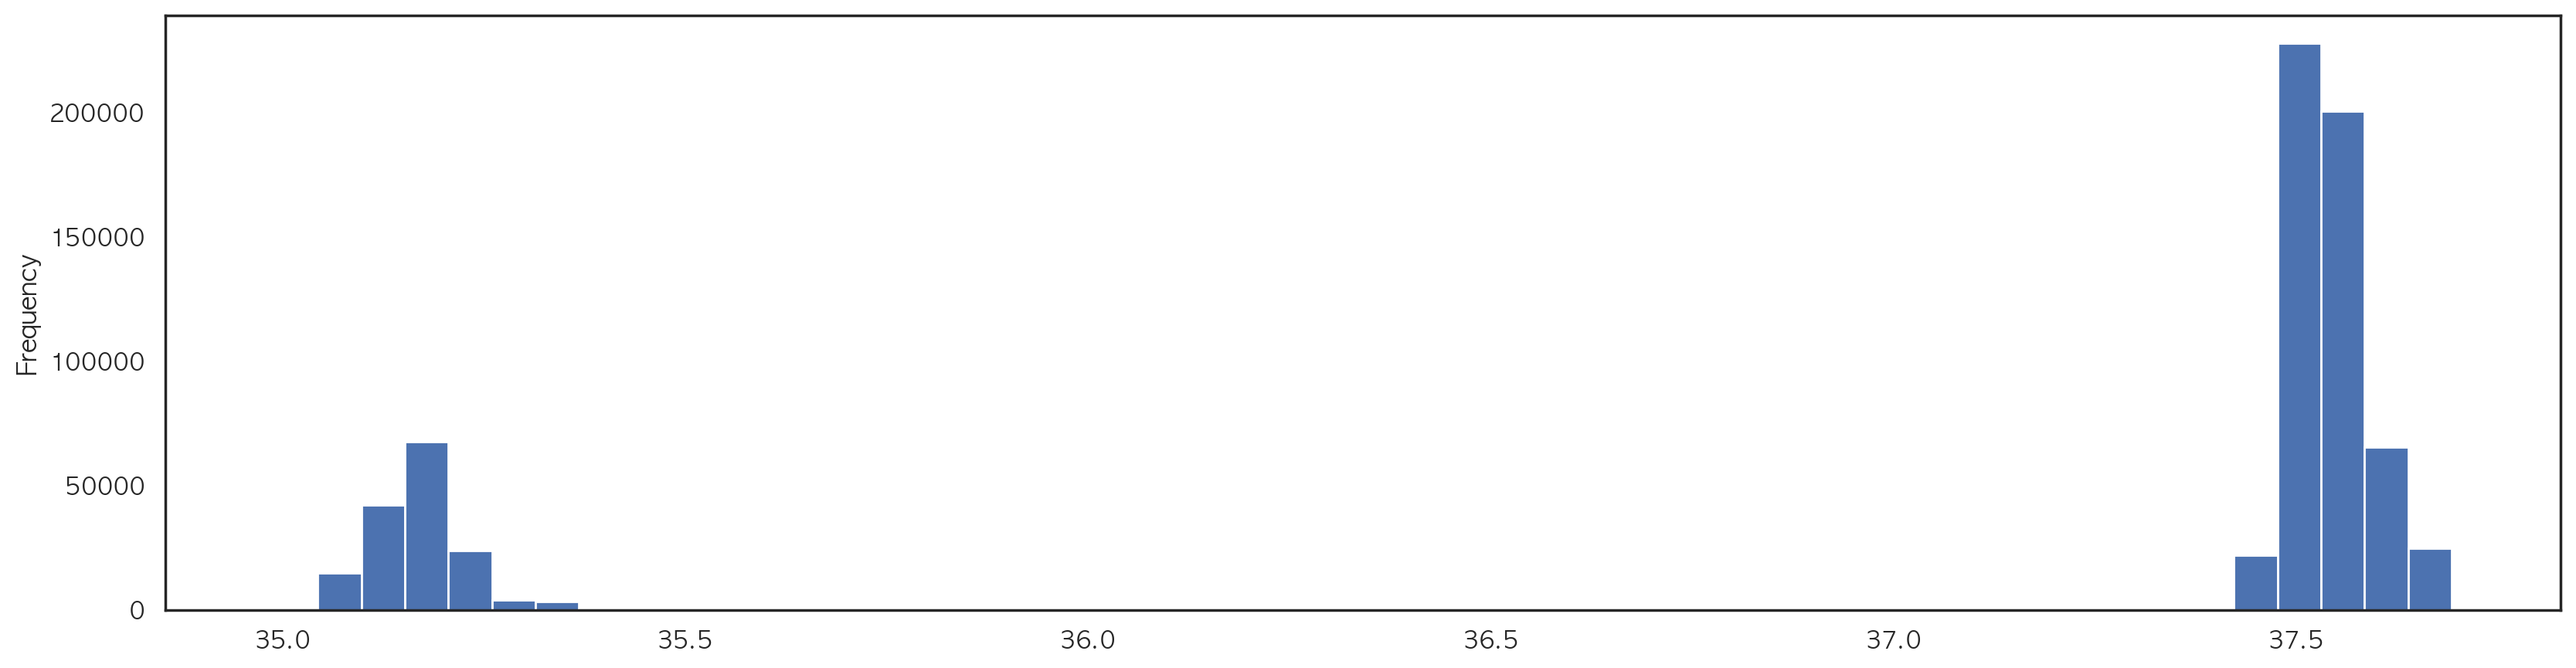

In [255]:
df['위도'].plot.hist(bins=50) # bins 

<Axes: >

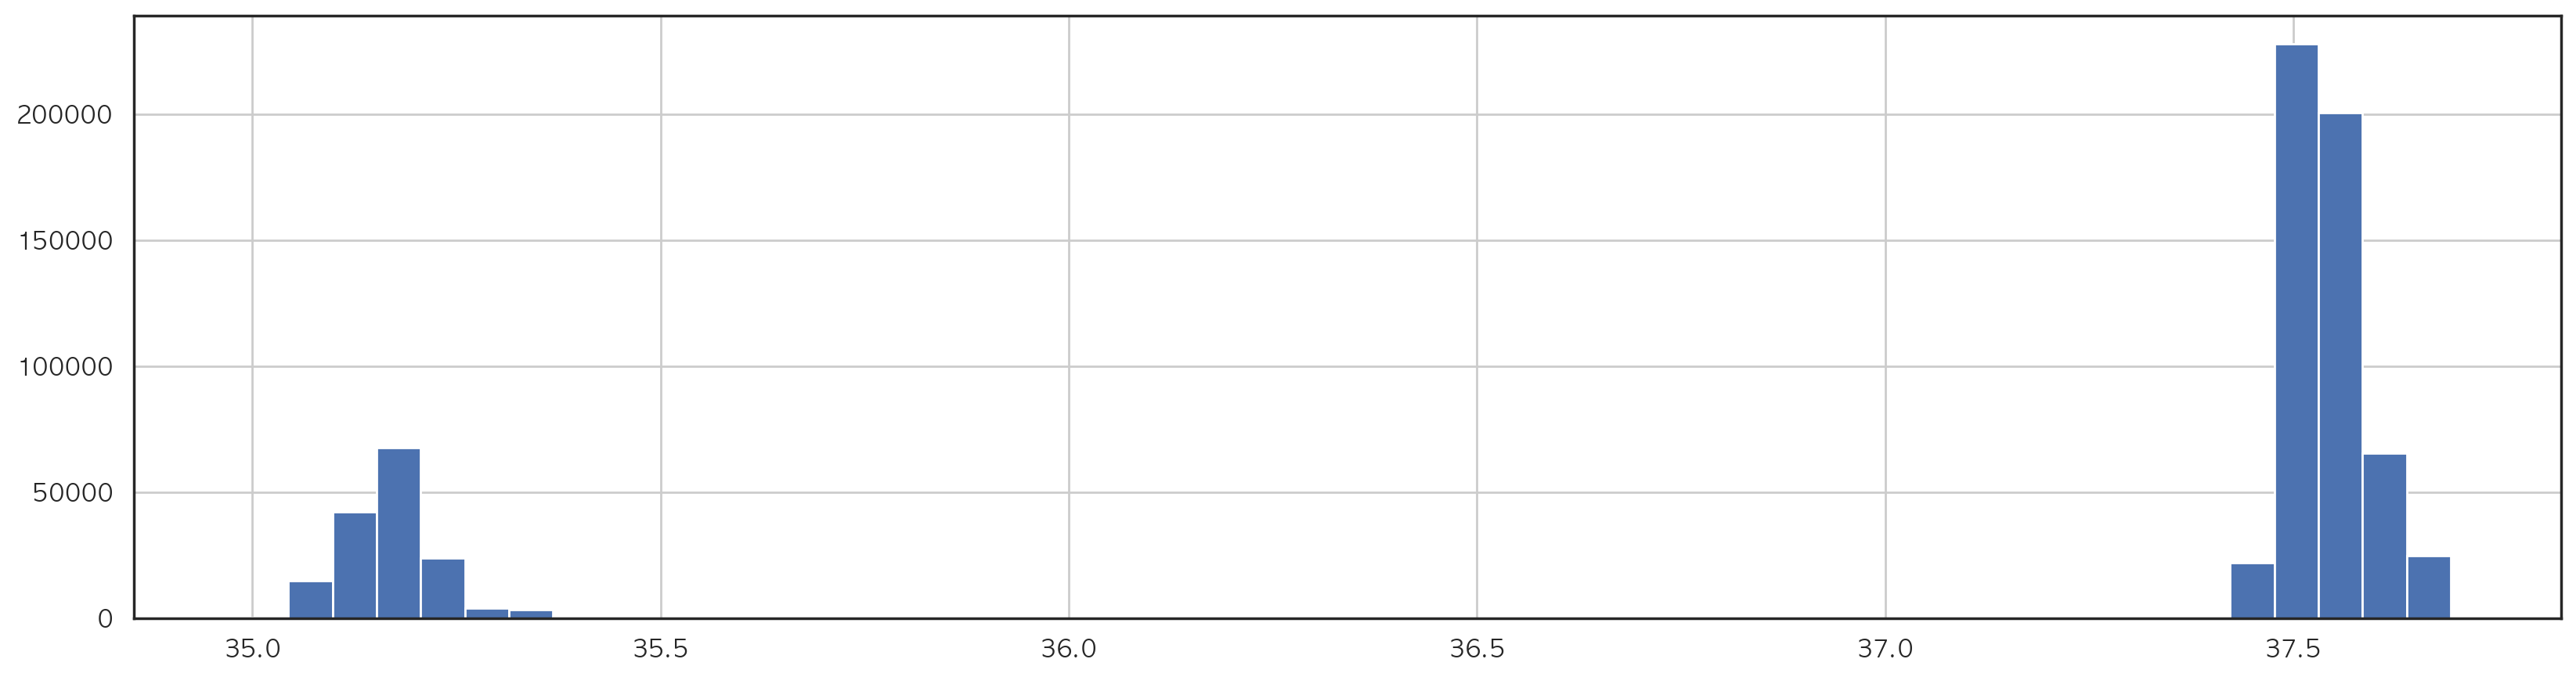

In [256]:
df['위도'].hist(bins=50) # bins 

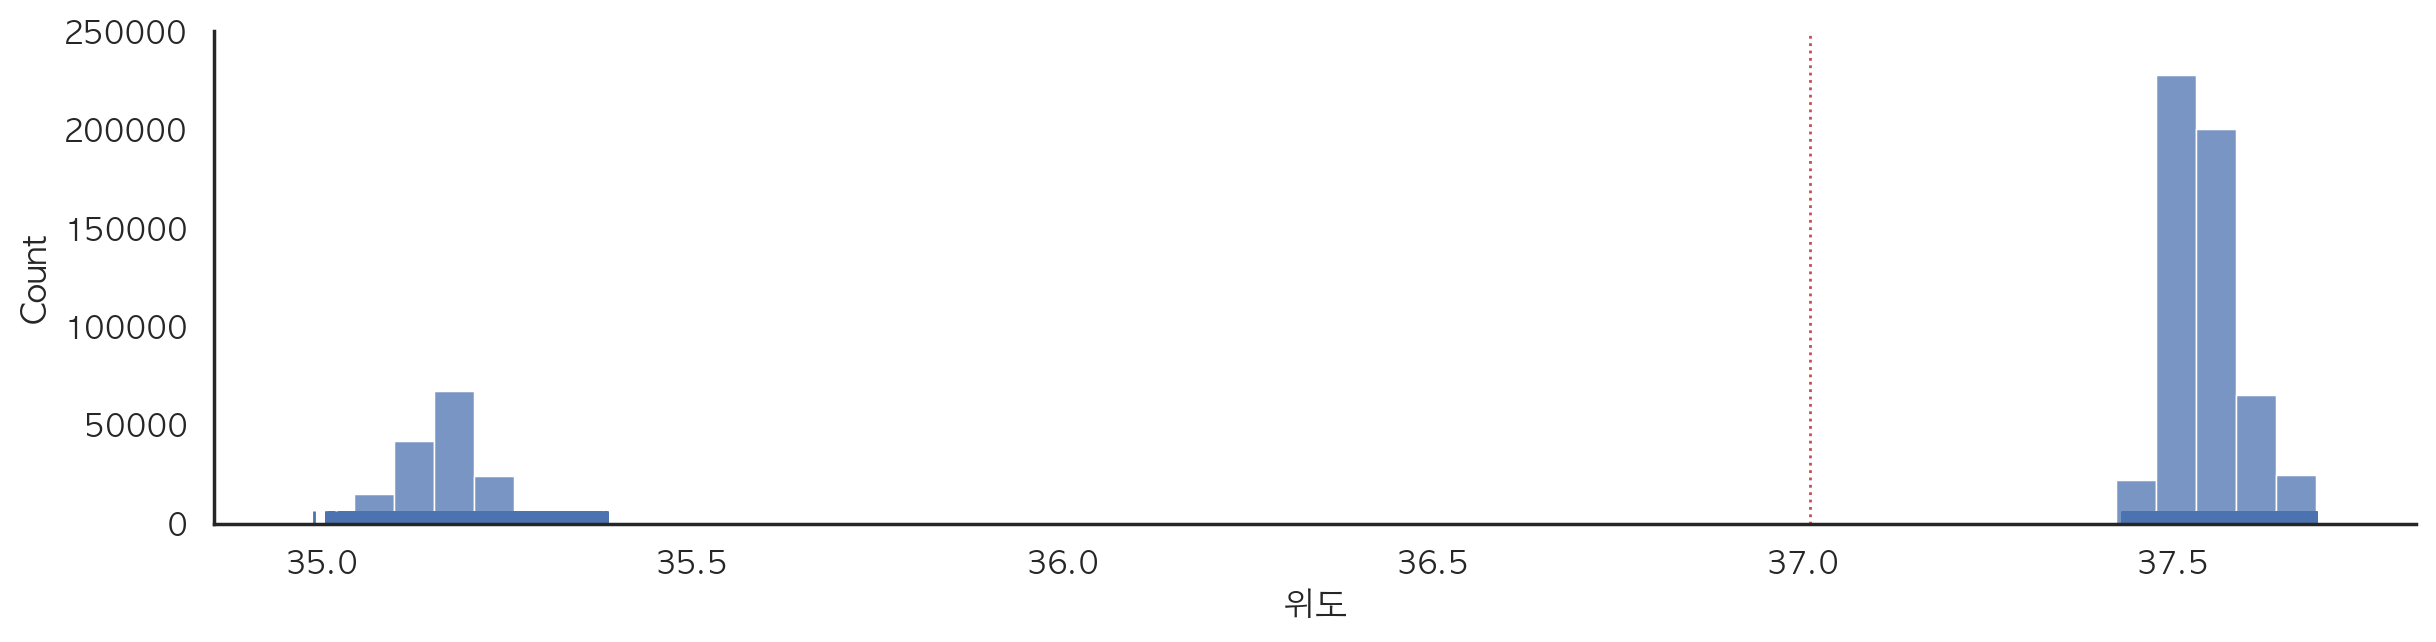

In [266]:
g = sns.displot(data=df, x="위도", bins=50, rug=True)
g.fig.set_size_inches(15, 3)
plt.axvline(df['위도'].mean(), color='r', linestyle=':', linewidth=1)
plt.show()

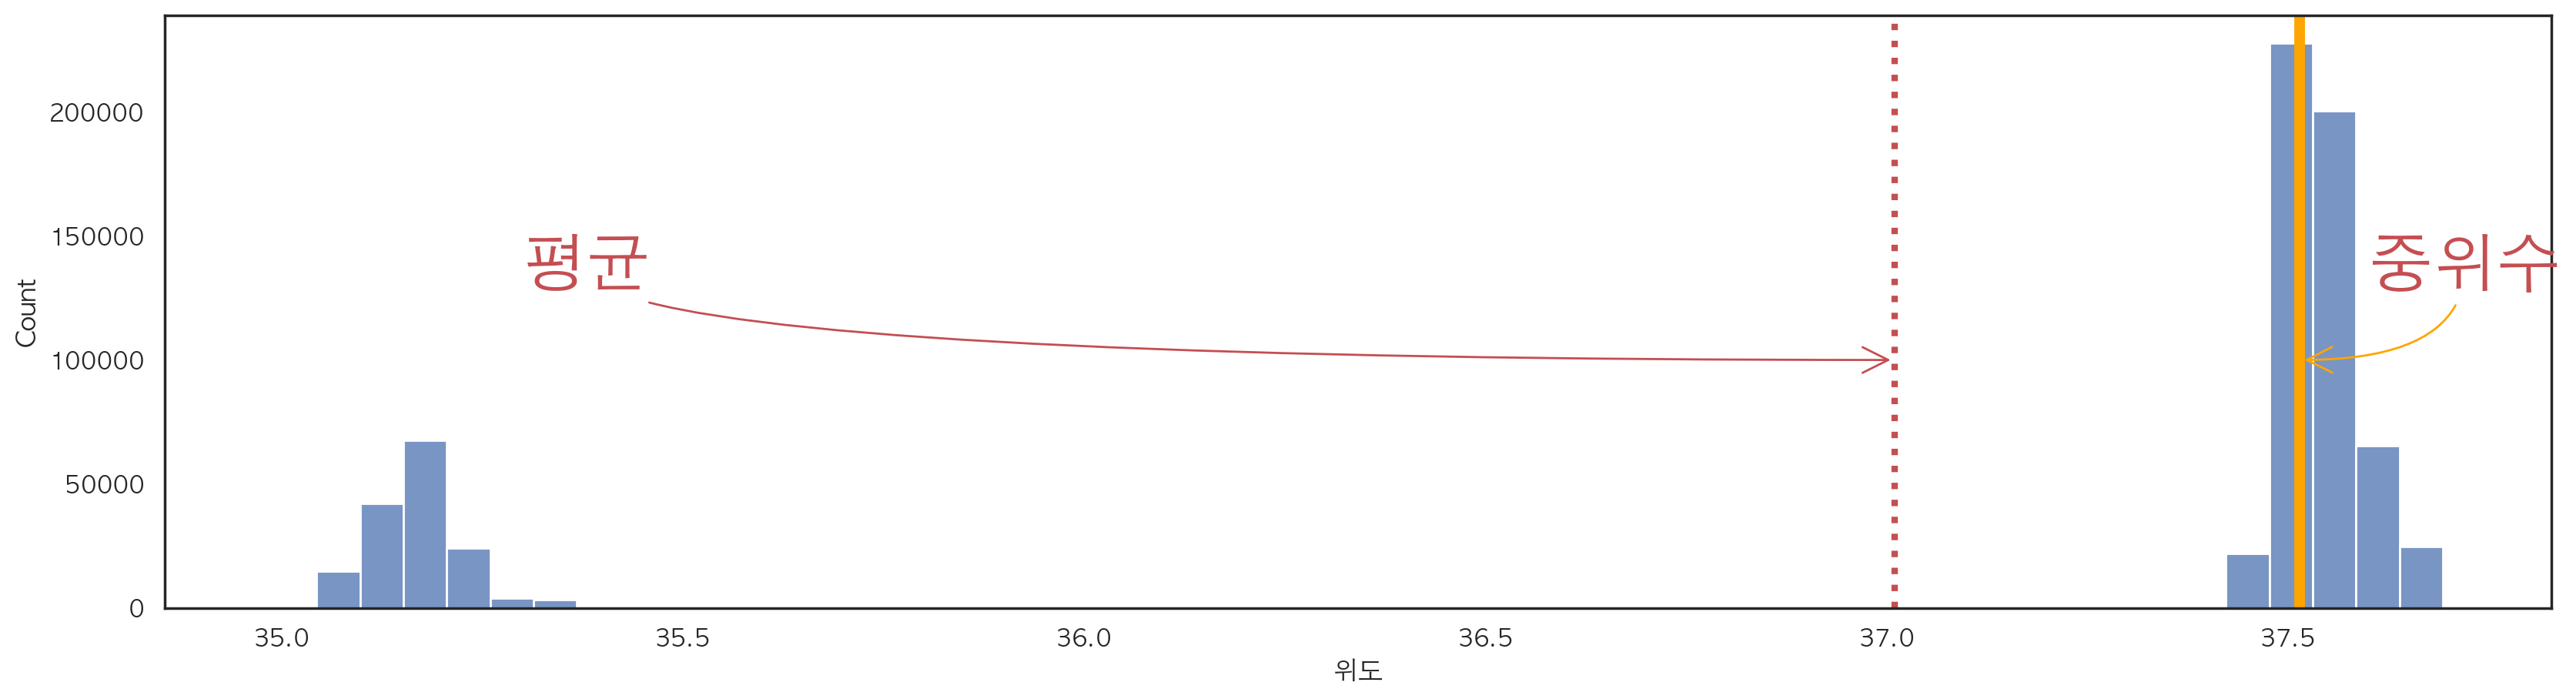

In [285]:
sns.histplot(data=df, x="위도", bins=50)
# 평균
plt.axvline(df['위도'].mean(), color='r', linestyle=':', linewidth=3)
plt.annotate(
    "평균",
    xytext=(35.3, 130000),  # 글자 좌표
    xy=(df['위도'].mean(), 100000),  # 화살표가 가르킬 좌표
    arrowprops=dict(arrowstyle='->', connectionstyle='angle3', color='r'),
    fontsize=30,
    color='r')
# 중위수 ()
plt.axvline(df['위도'].median(), color='orange', linewidth=5)
plt.annotate(
    "중위수",
    xytext=(37.6, 130000),  # 글자 좌표
    xy=(df['위도'].median(), 100000),  # 화살표가 가르킬 좌표
    arrowprops={
        'arrowstyle': '->',
        'connectionstyle': 'angle3',
        'color': 'orange'
    },
    fontsize=30,
    color='r')
plt.show()

In [272]:
# 왜도 : 평균을 기준으로 치우친 정도
# 오른쪽으로 치우침  : 왜도가 음수. 평균 < 중위수 
# 왼쪽으로 치우침 : 왜도가 양수. 중쉬수 < 평균 
df['위도'].skew()

-1.3235077358631402

## 2. 경도의 빈도표를 시각화 : plot.hist, hist, sns.displot, sns.histplot


<Axes: ylabel='Frequency'>

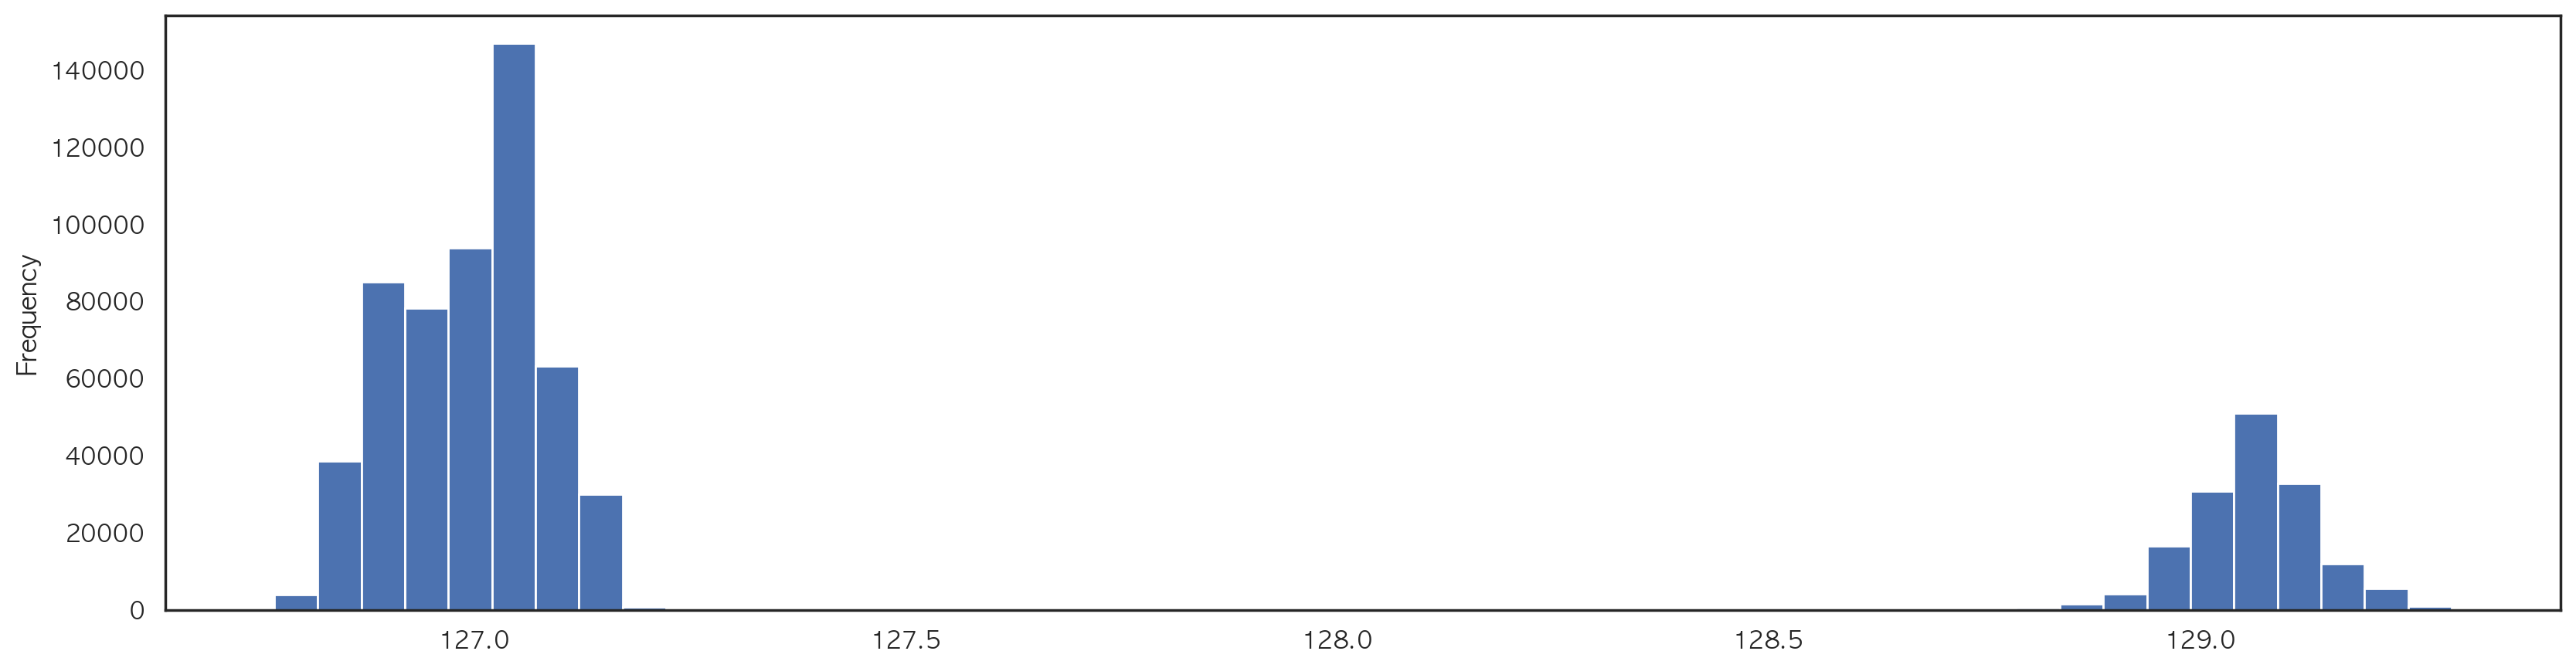

In [286]:
df['경도'].plot.hist(bins=50) # bins 

<Axes: >

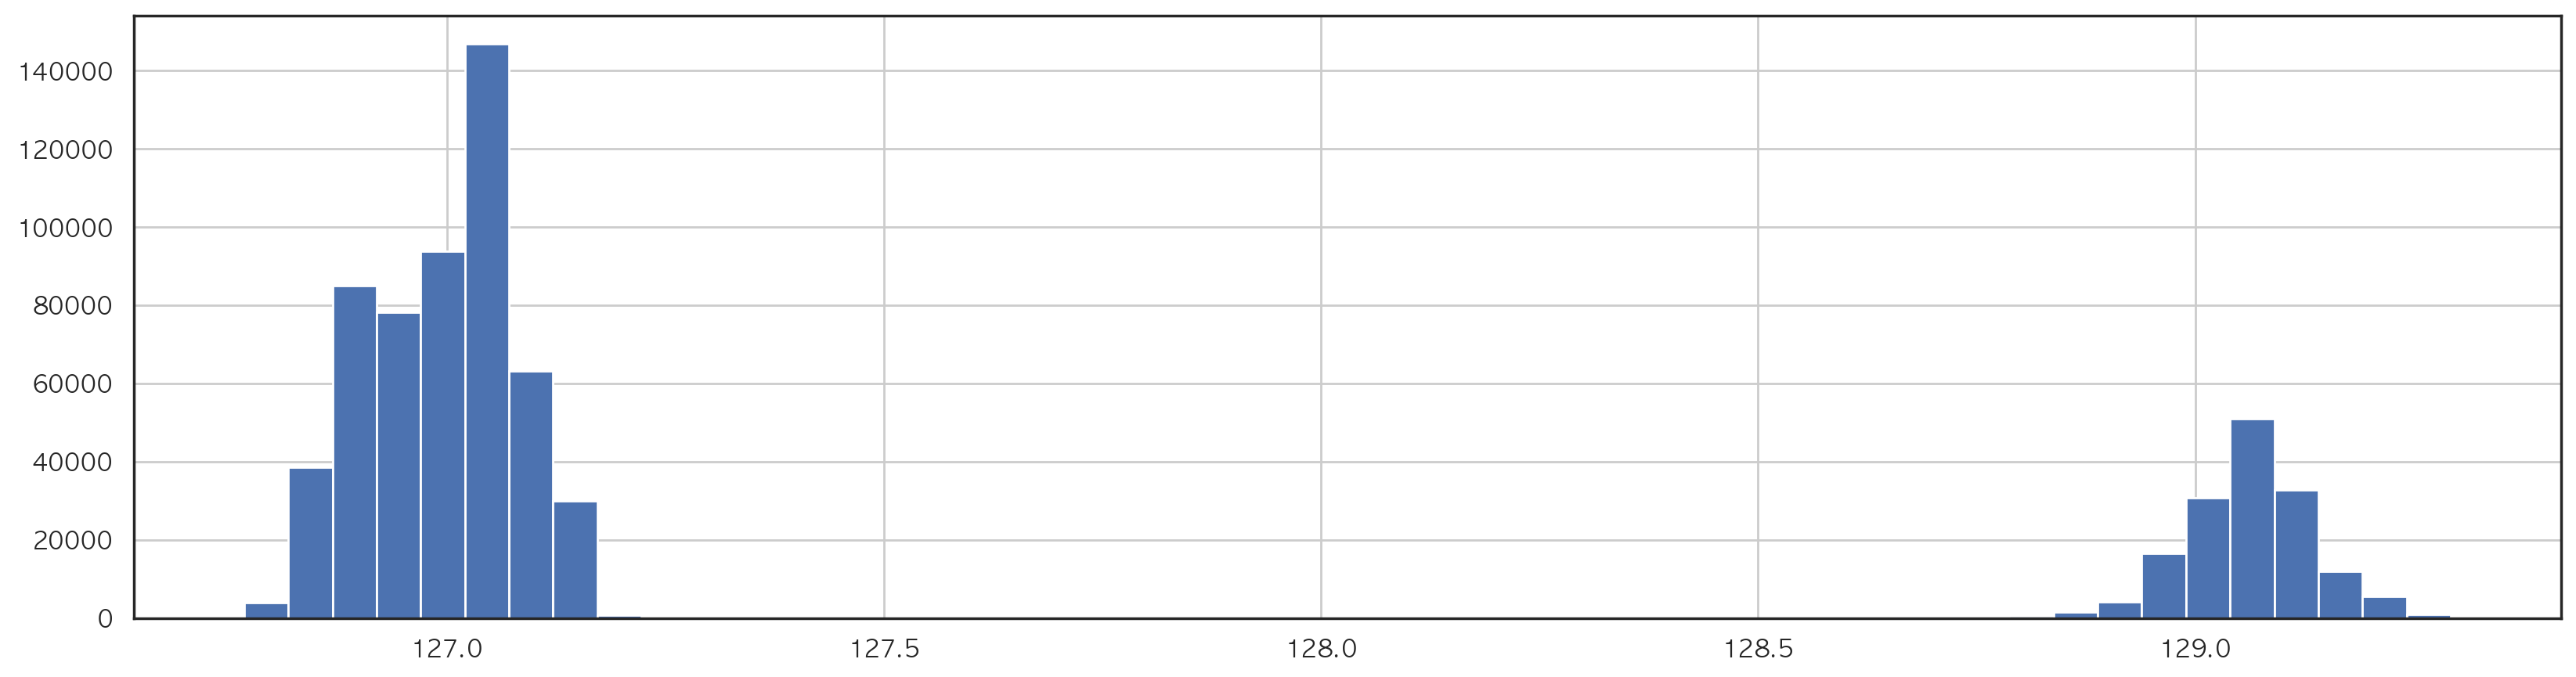

In [287]:
df['경도'].hist(bins=50)

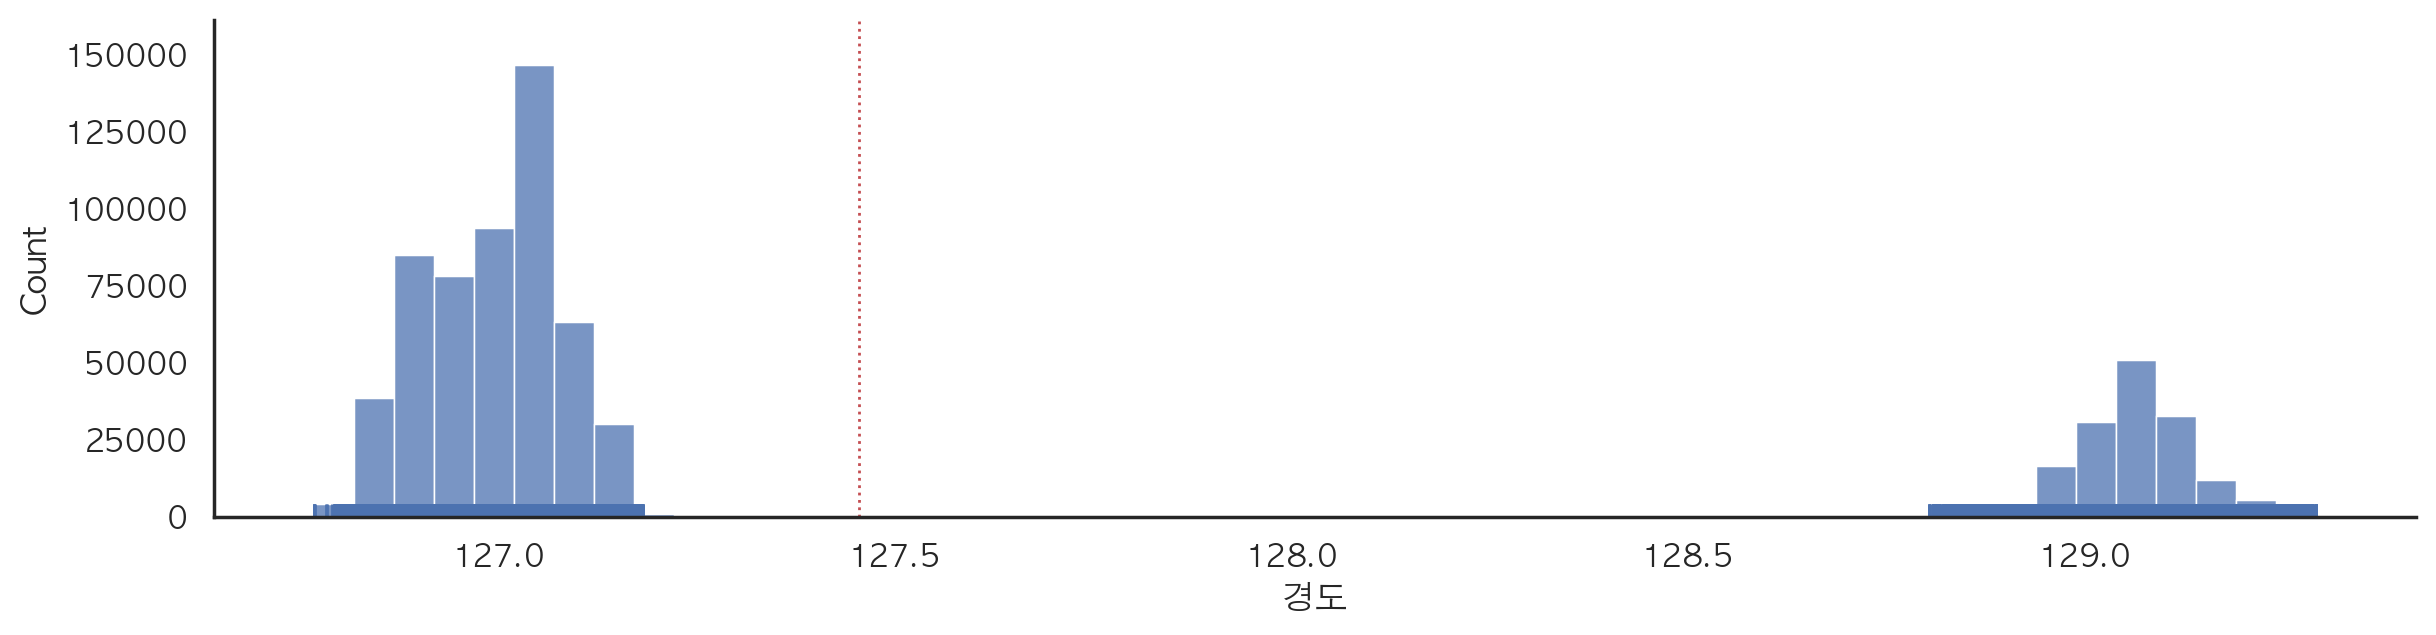

In [288]:
g = sns.displot(data=df, x="경도", bins=50, rug=True)
g.fig.set_size_inches(15, 3)
plt.axvline(df['경도'].mean(), color='r', linestyle=':', linewidth=1)
plt.show()

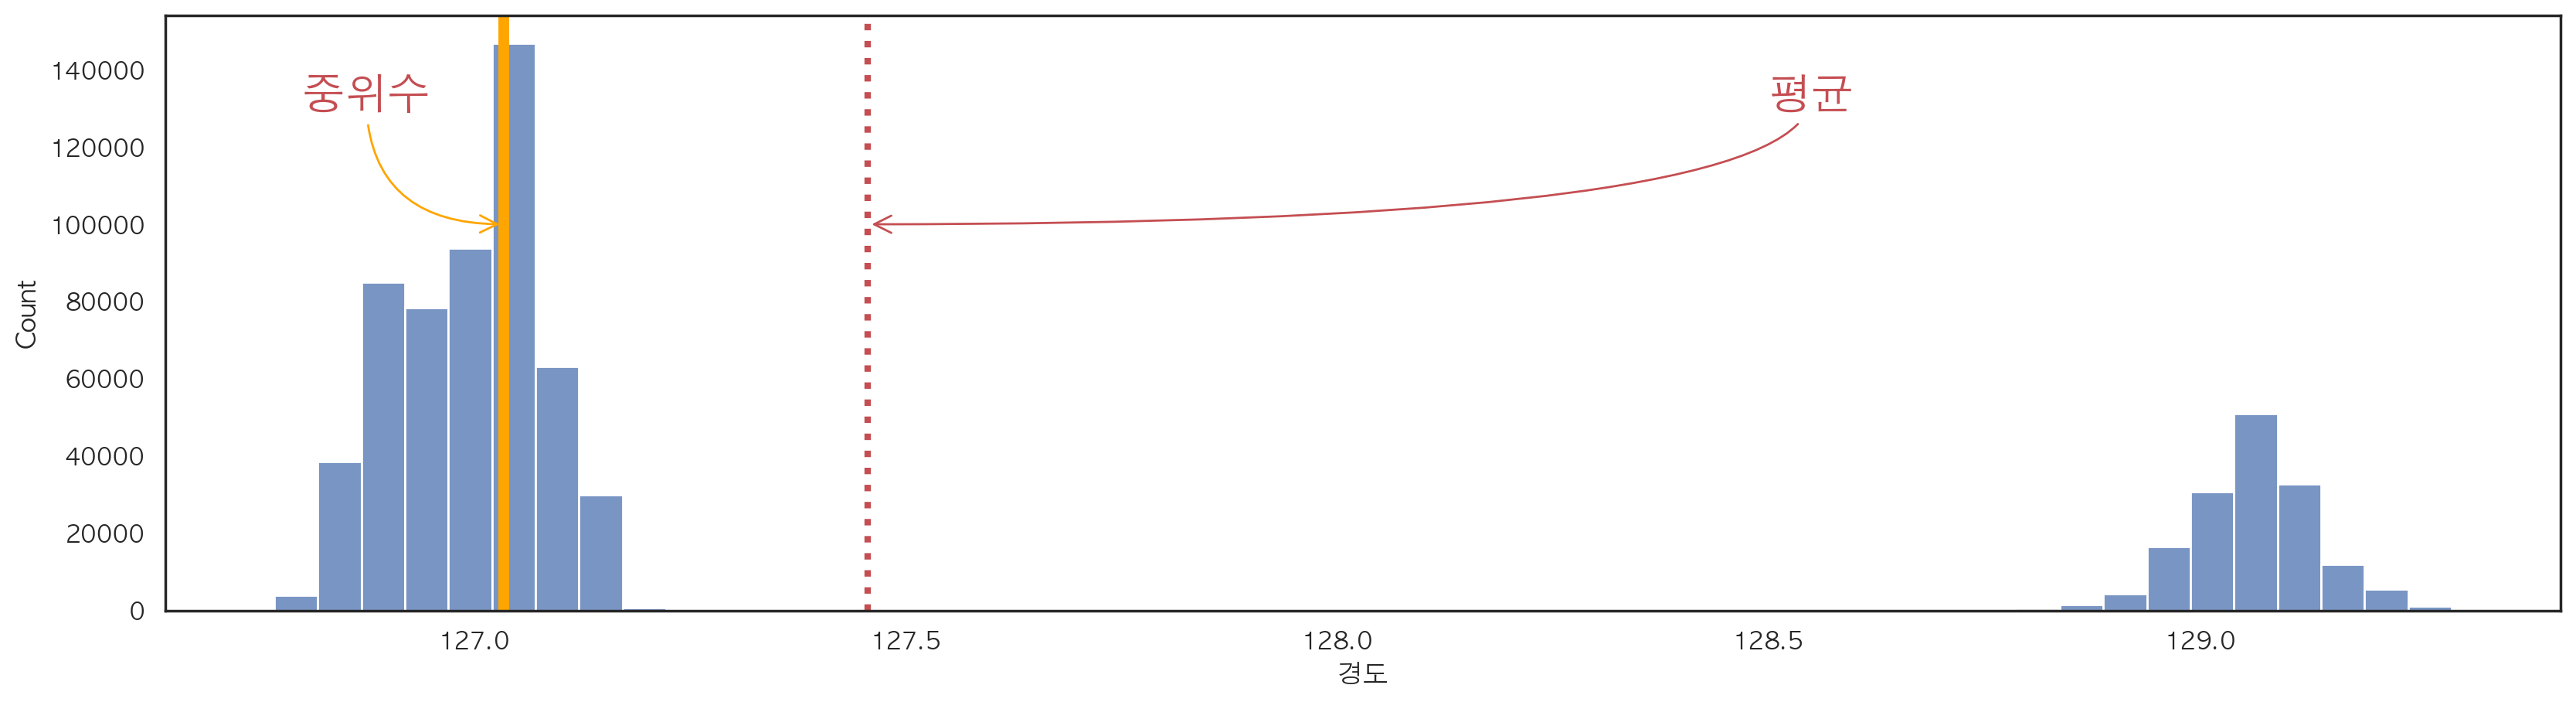

In [313]:
sns.histplot(data=df, x="경도", bins=50)
# 평균
plt.axvline(df['경도'].mean(), color='r', linestyle=':', linewidth=3)
plt.annotate(
    "평균",
    xytext=(128.5, 130000),  # 글자 좌표
    xy=(df['경도'].mean(), 100000),  # 화살표가 가르킬 좌표
    arrowprops=dict(arrowstyle='->', connectionstyle='angle3', color='r'),
    fontsize=20,
    color='r')

# # 중위수 ()
plt.axvline(df['경도'].median(), color='orange', linewidth=5)
plt.annotate(
    "중위수",
    xytext=(126.8, 130000),  # 글자 좌표
    xy=(df['경도'].median(), 100000),  # 화살표가 가르킬 좌표
    arrowprops={
        'arrowstyle': '->',
        'connectionstyle': 'angle3',
        'color': 'orange'
    },
    fontsize=20,
    color='r')
plt.show()

In [292]:
df.경도.skew()

1.3076255398048455

# 8. 상관계수

-  두 변수 간에 어떤 선형적 관계를 갖고 있는 지를 분석하는 방법
- [상관 분석 - 위키백과, 우리 모두의 백과사전M](https://ko.wikipedia.org/wiki/상관_분석) 


- 결과의 해석 : r 값은 X 와 Y 가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일 하면 –1 을 가진다. 결정계수(coefficient of determination)는 $r^2$로 계산하며 이것은 X 로부터 Y를 예측할 수 있는 정도를 의미한다.
- ([수학기호 사이트 참조](https://matplotlib.org/2.0.2/users/mathtext.html))


- 일반적으로
    * r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
    * r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
    * r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
    * r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
    * r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
    * r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
    * r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계로 해석한다.


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/220px-Correlation_examples2.svg.png" width="600">


이미지 출처 : [위키백과](https://ko.wikipedia.org/wiki/상관_분석)


## 1. 전체 숫자 컬럼끼리의 상관계수


In [324]:
corr = df.corr(numeric_only=True)
corr

,지번본번지,건물본번지,경도,위도
지번본번지,1.000000,0.057312,0.169355,-0.189570
건물본번지,0.057312,1.000000,-0.005815,0.012164
경도,0.169355,-0.005815,1.000000,-0.993565
위도,-0.189570,0.012164,-0.993565,1.000000


## 2. 상관계수를 이용하여 heatmap 시각화

- 참조 http://seaborn.pydata.org/examples/many_pairwise_correlations.html 

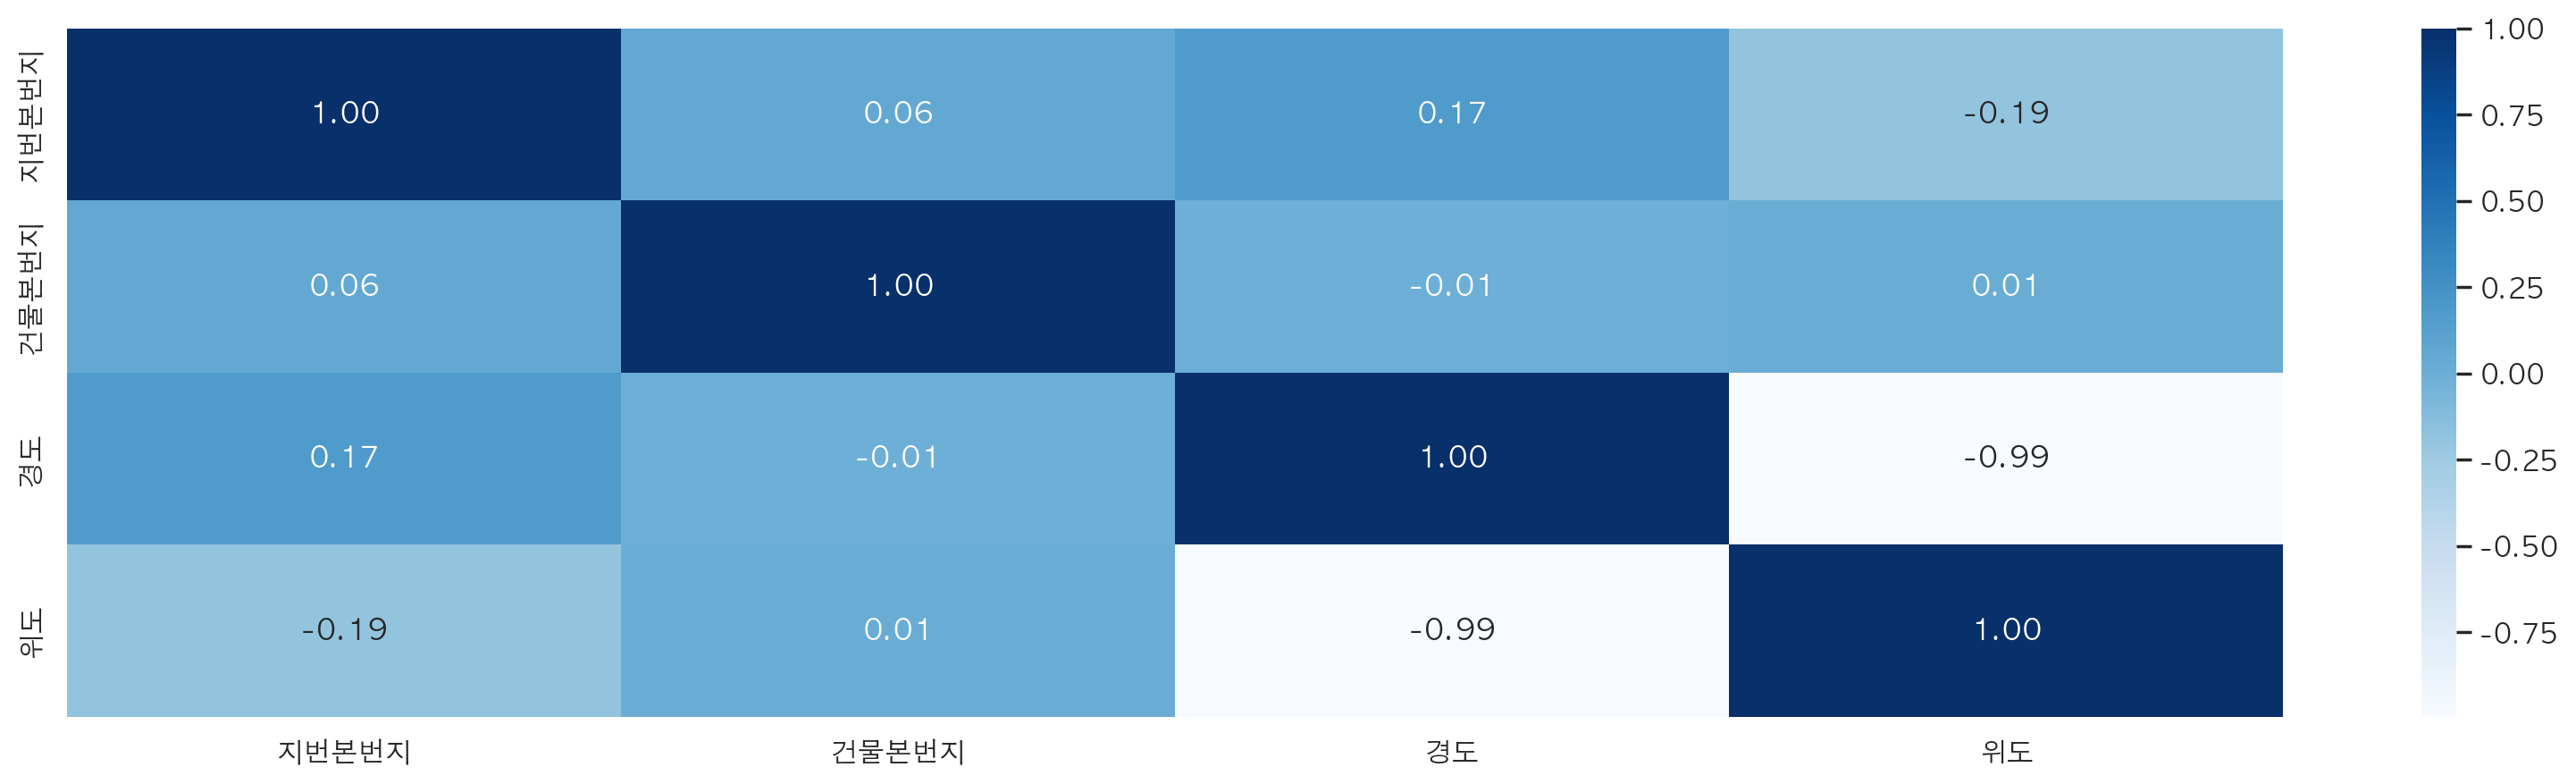

In [335]:
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues')
plt.show()

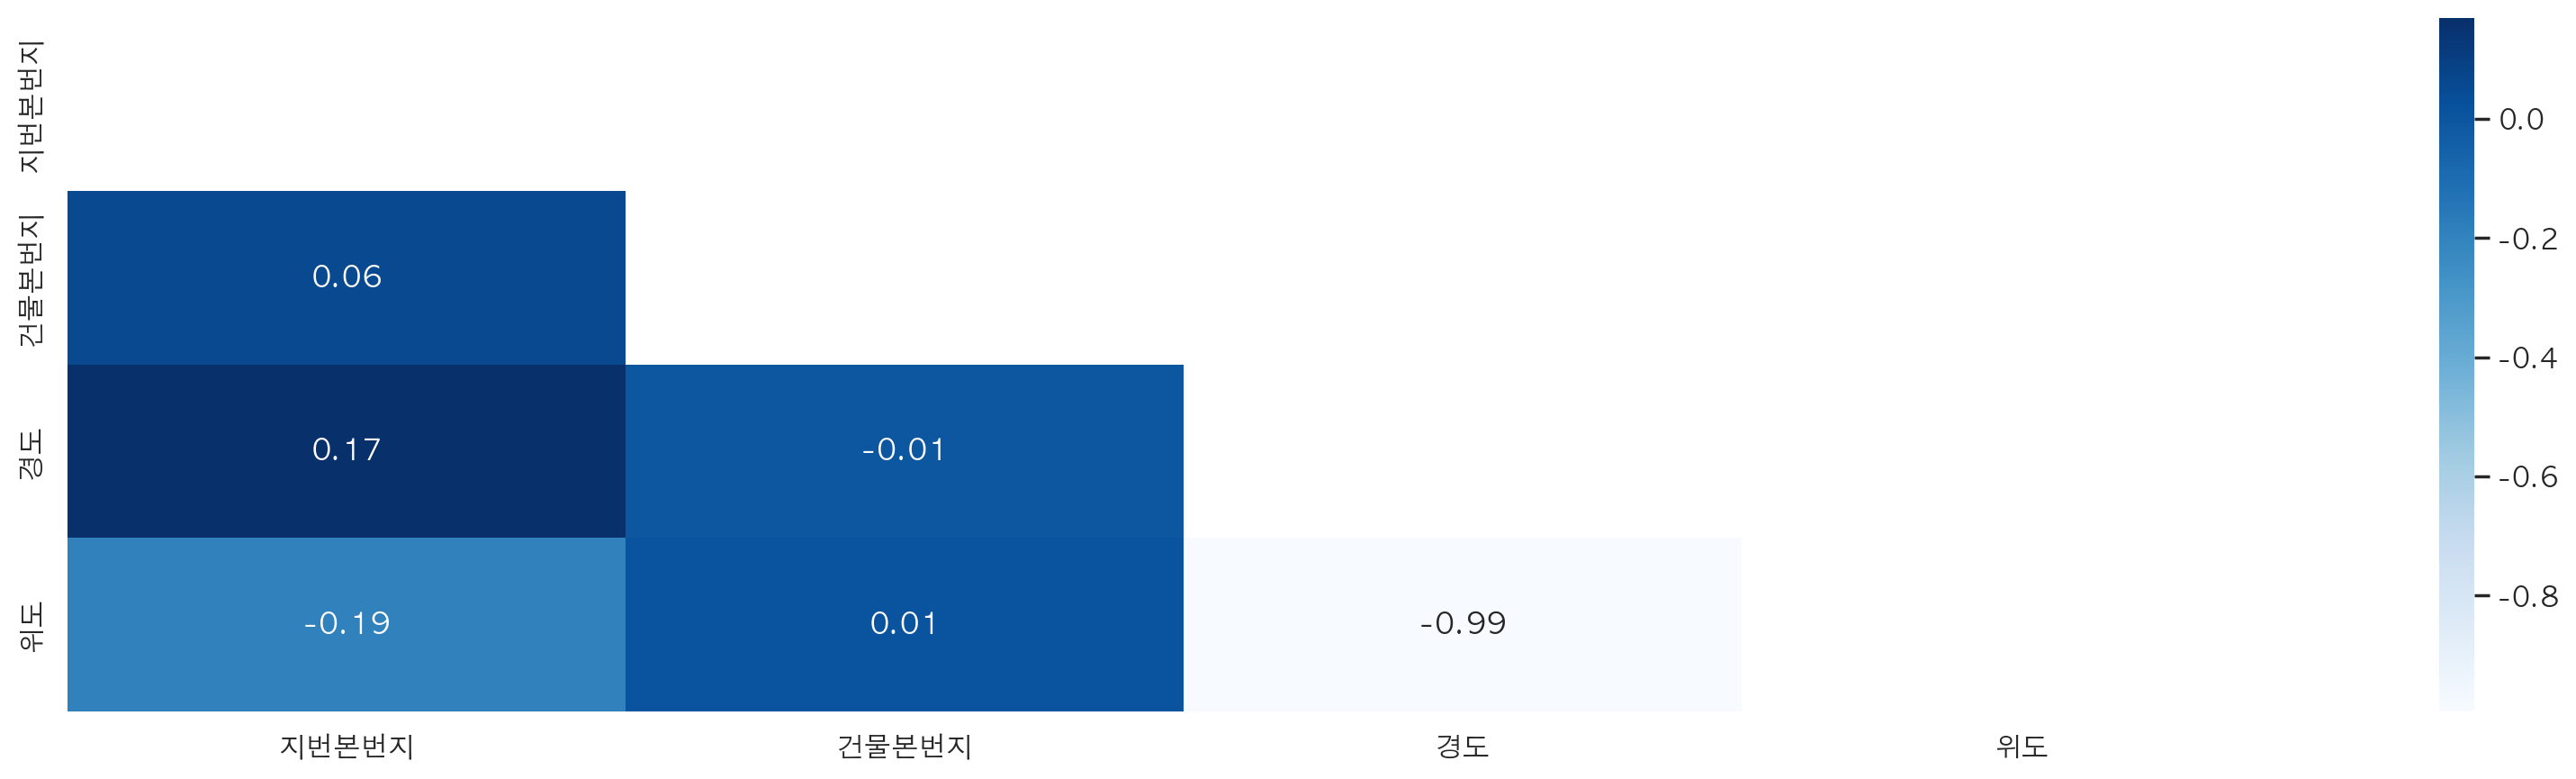

In [336]:
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues', mask=mask)
plt.show()

In [365]:
a = np.array([[2.0, 1,3], [1, 1,3],[-1,-1,-2]]) # 2행 2열짜리 배열

np.ones((3, 3), dtype=bool) # 매개변수에 온 구조의 배열에 1로 

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [366]:
np.ones_like(a) # a 변수와 구조가 같은 배열에 1로

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [368]:
temp = np.ones_like(corr, dtype=bool) # corr변수와 구조가 같은 배열에 1
temp

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [381]:
mask = np.triu(temp,k=0)
mask

array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True]])

<Axes: >

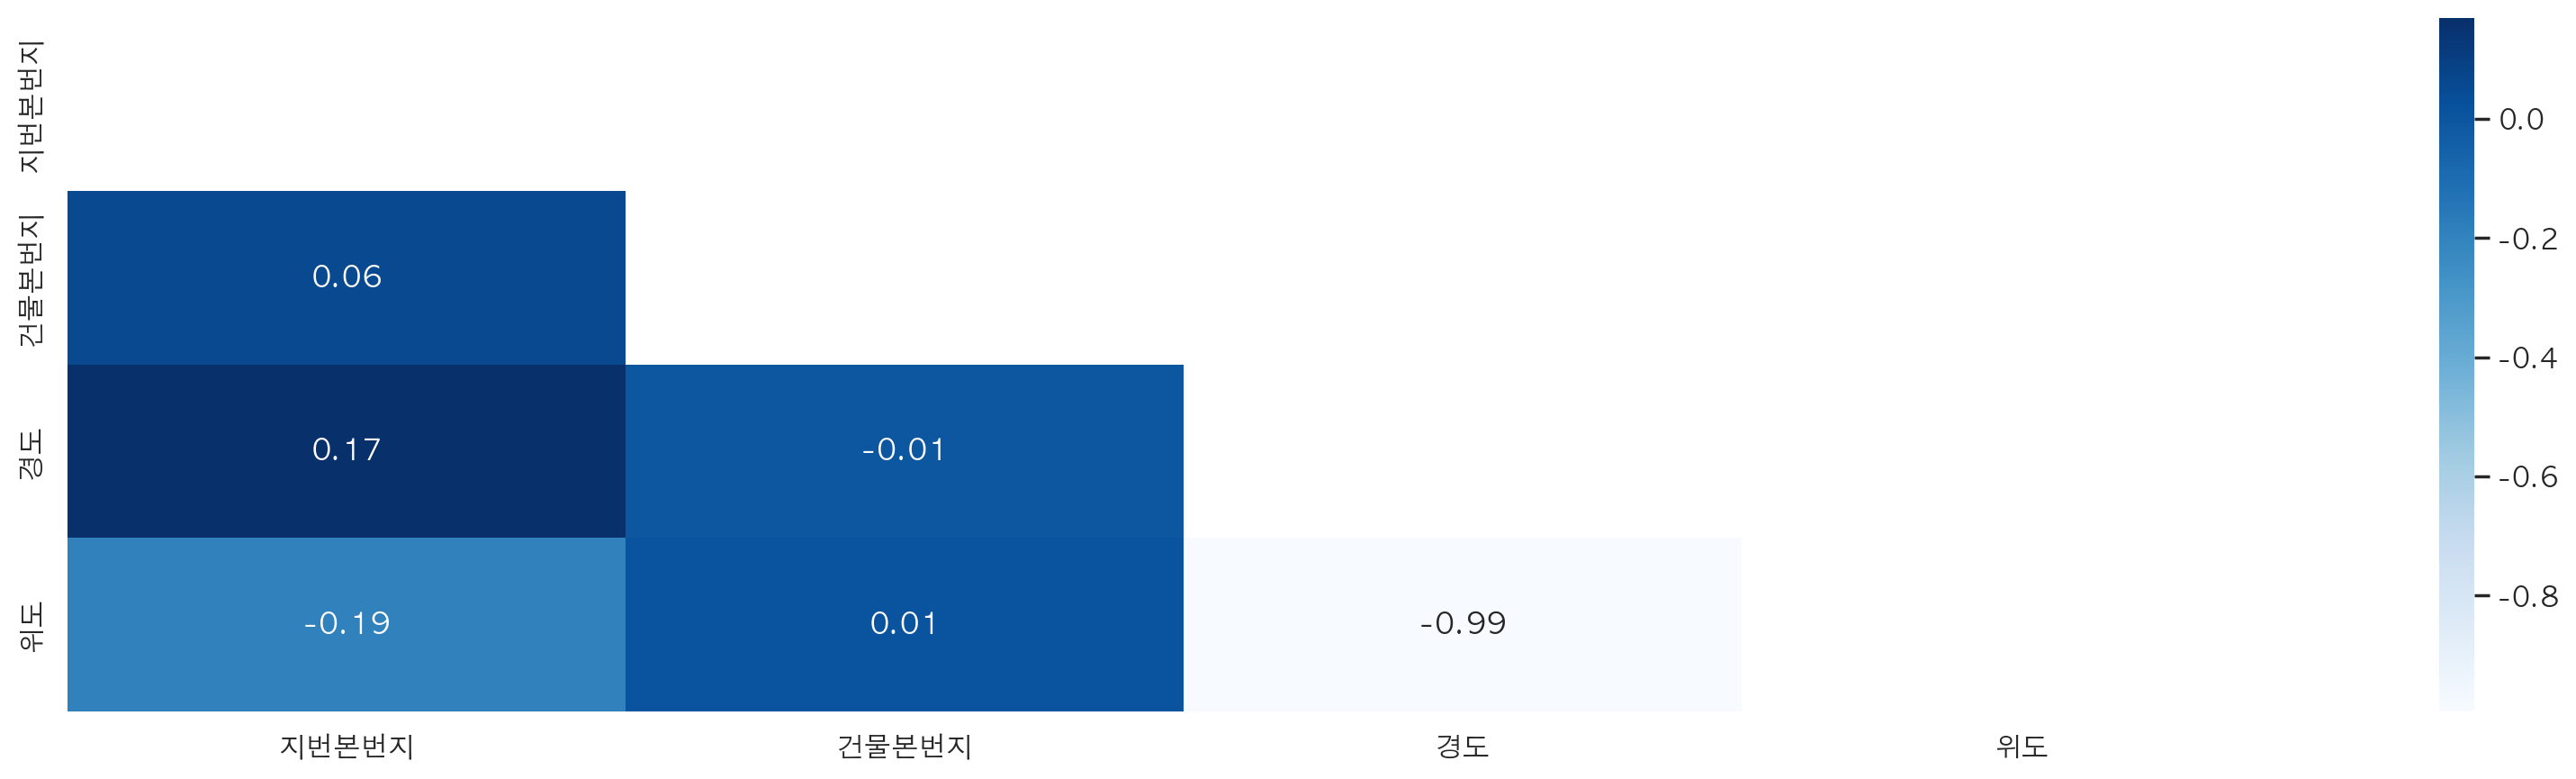

<Axes: >

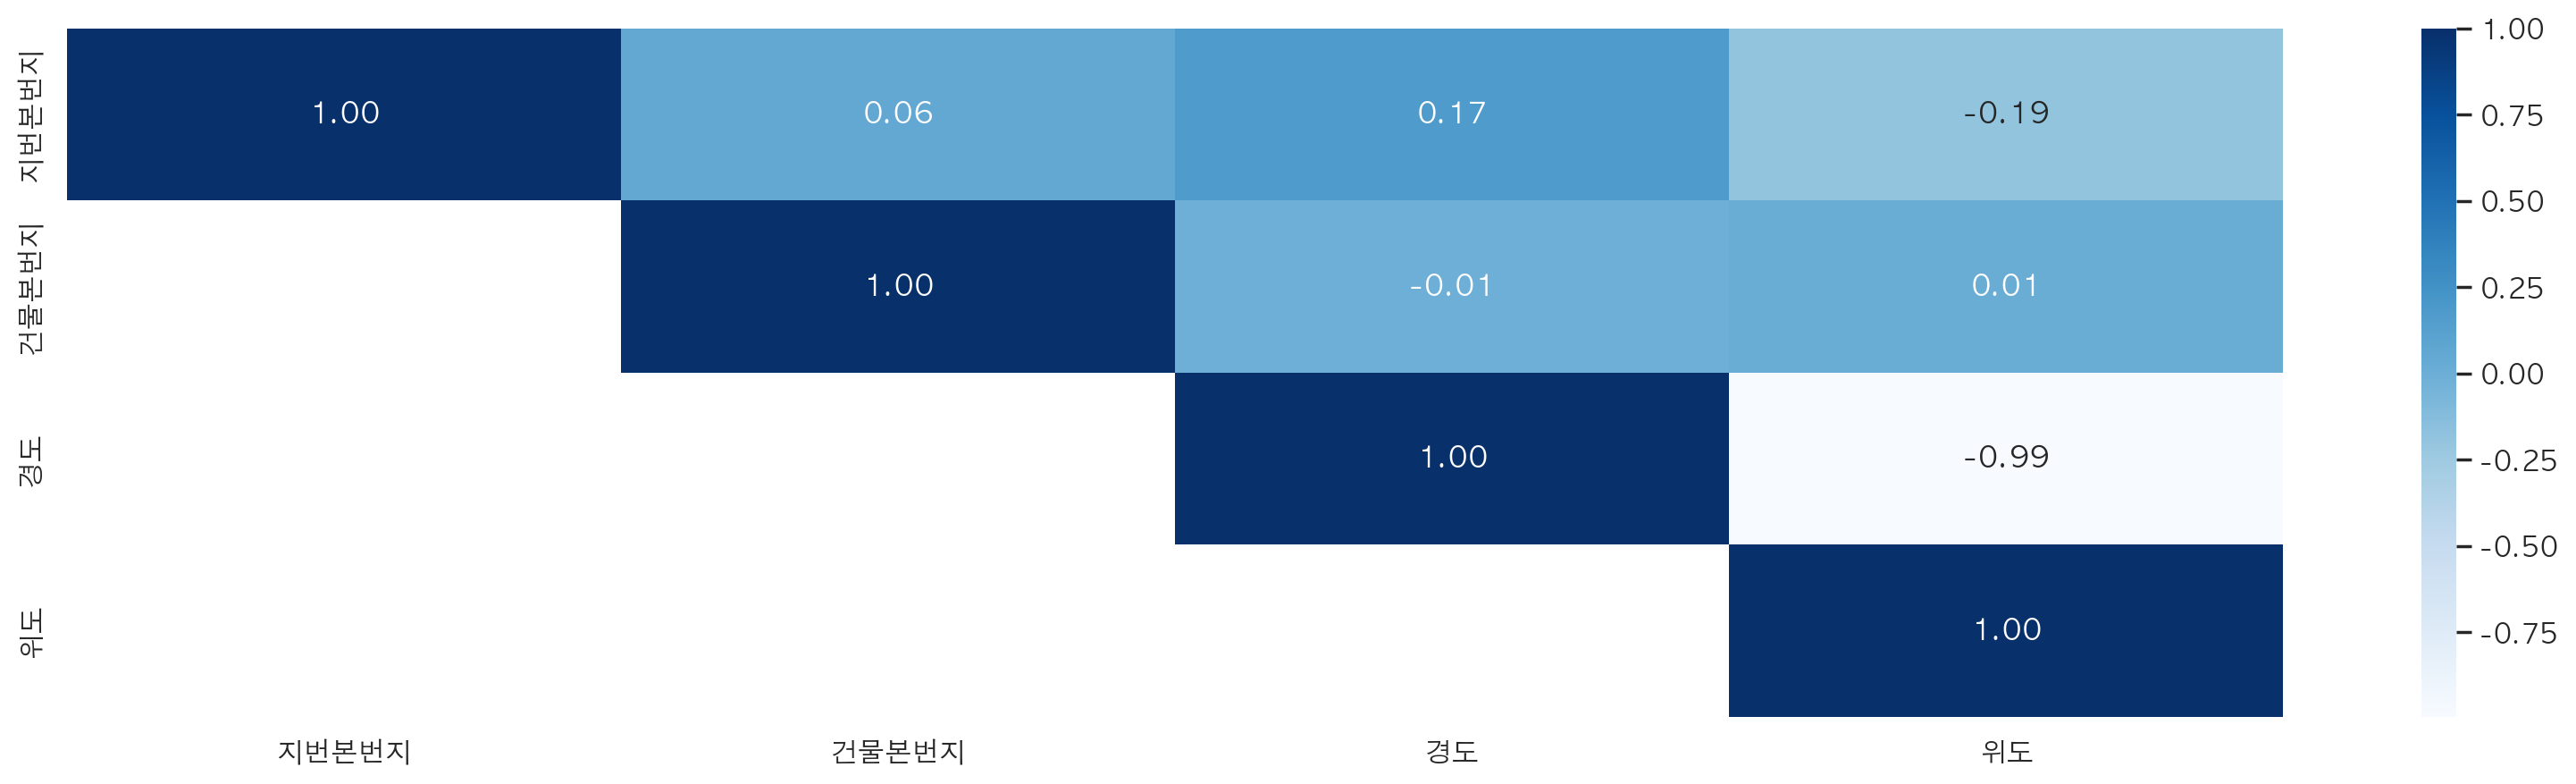

In [392]:
mask = np.triu(np.ones_like(corr, dtype=bool), k=0) # k=0 기본값

display(sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues', mask=mask)) # 밑으로
plt.show()

display(sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues', mask=~mask)) # '~' 로 위로
plt.show()

# 9. 경도와 위도 컬럼을 이용하여 산점도

- [Anscombe’s quartet — seaborn 0.10.0 documentation](https://seaborn.pydata.org/examples/anscombes_quartet.html)

## 1. X축에는 경도, y축에는 위도 컬럼을 산점도로 시각화

